# Parte I: Análisis de la base de hogares y tipo de ocupación

***EJ 1***

Exploren el diseño de registro de la base de hogar: a priori, ¿qué
 variables creen pueden ser predictivas de la desocupación y seria útil
 incluir para perfeccionar el ejercicio del TP3? Mencionen estas variables
 y justifiquen su elección.

***EJ 2***


*   Descarguen la base de microdatos de la EPH correspondiente al primer
 trimestre de 2004 y 2024 en formato .dta y .xls, respectivamente. La
 base de hogares se llama Hogar_t104.dta y usu_hogar_T124.xls,
 respectivamente.
*  Eliminen todas las observaciones que no corresponden
 a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos
 Aires y unan ambos trimestres en una sola base. Esto es, a la base de la
 encuesta individual de cada año (que usaron en el TP3) unan la base de
 la encuesta de hogar. Asegúrese de estar usando las variables
 CODUSU y NRO_Hogar para el merge.

In [ ]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.2 MB/s eta 0:00:00


In [ ]:
#!pip install matplotlib.pyplot

In [ ]:
#!pip install openpyxl

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pyreadstat  # Para leer archivos .dta de Stata


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
hogar_2004, meta = pyreadstat.read_dta("/content/Hogar_t104.dta")


# dejo solo las observaciones donde aglomerado es igual a 32 o 33 (CABA o GBA)
hogar_2004 = hogar_2004[(hogar_2004['aglomerado'] == 32) | (hogar_2004['aglomerado'] == 33) | (hogar_2004['aglomerado'] == 2) | (hogar_2004['aglomerado'] == 3) | (hogar_2004['aglomerado'] == 34)]
hogar_2004.columns = hogar_2004.columns.str.lower()

print("Datos hogar de 2004 (solo CABA Y GBA):")
hogar_2004.head()


Datos hogar de 2004 (solo CABA Y GBA):


,codusu,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,iv1_esp,iv2,iv3,iv3_esp,iv4,iv5,iv6,iv7,iv7_esp,iv8,iv9,iv10,iv11,iv12_1,iv12_2,iv12_3,ii1,ii2,ii3,ii3_1,ii4_1,ii4_2,ii4_3,ii5,ii5_1,ii6,ii6_1,ii7,ii7_esp,ii8,ii8_esp,ii9,v1,v2,v21,v22,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19_a,v19_b,ix_tot,ix_men10,ix_mayeq10,itf,decifr,idecifr,rdecifr,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph
0,125051,1.0,1.0,2004.0,1.0,43.0,S,2.0,355.0,1.0,,2.0,1.0,,4.0,1.0,1.0,1.0,,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,1.0,,2.0,,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,1.0,4.0,357.0,02,03,02,02,,02,71.400000,01,02,01,01,,01,1.0,0.0,3.0,0.0,0.0,0.0,00000
1,125082,1.0,1.0,2004.0,1.0,43.0,S,2.0,306.0,1.0,,4.0,1.0,,3.0,1.0,1.0,1.0,,1.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,3.0,,1.0,,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,502.0,04,04,04,04,,03,167.333333,04,04,03,03,,02,2.0,0.0,98.0,0.0,0.0,0.0,10000
2,125181,1.0,1.0,2004.0,1.0,43.0,S,2.0,541.0,1.0,,2.0,1.0,,3.0,1.0,1.0,1.0,,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,1.0,,1.0,,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,2000.0,09,09,09,09,,09,666.666667,09,09,09,09,,09,2.0,0.0,1.0,3.0,0.0,0.0,00000
3,125283,1.0,1.0,2004.0,1.0,43.0,S,2.0,255.0,1.0,,3.0,1.0,,4.0,1.0,1.0,1.0,,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,,1.0,,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,NaN,4.0,1834.0,09,09,09,09,,09,458.500000,08,08,08,07,,07,1.0,2.0,3.0,4.0,0.0,0.0,10000
4,126192,1.0,1.0,2004.0,1.0,43.0,S,2.0,218.0,1.0,,4.0,1.0,,4.0,1.0,1.0,1.0,,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,8.0,,1.0,,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,1622.0,09,09,09,08,,08,540.666667,08,09,08,08,,08,2.0,0.0,97.0,0.0,0.0,0.0,10000


In [ ]:
hogar_2024 = pd.read_excel("/content/usu_hogar_T124.xlsx")

hogar_2024 = hogar_2024[(hogar_2024['AGLOMERADO'] == 32) | (hogar_2024['AGLOMERADO'] == 33) | (hogar_2024['AGLOMERADO'] == 2) | (hogar_2024['AGLOMERADO'] == 3) | (hogar_2024['AGLOMERADO'] == 34)]
hogar_2024.columns = hogar_2024.columns.str.lower()

print("Datos hogar de 2004 (solo CABA Y GBA):")
hogar_2024.head()

#hogar_2024['aglomerado']


Datos hogar de 2004 (solo CABA Y GBA):


,codusu,ano4,trimestre,nro_hogar,realizada,region,mas_500,aglomerado,pondera,iv1,iv1_esp,iv2,iv3,iv3_esp,iv4,iv5,iv6,iv7,iv7_esp,iv8,iv9,iv10,iv11,iv12_1,iv12_2,iv12_3,ii1,ii2,ii3,ii3_1,ii4_1,ii4_2,ii4_3,ii5,ii5_1,ii6,ii6_1,ii7,ii7_esp,ii8,ii8_esp,ii9,v1,v2,v21,v22,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19_a,v19_b,ix_tot,ix_men10,ix_mayeq10,itf,decifr,idecifr,rdecifr,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pondih,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
5,TQRMNOSPRHLMNNCDEIIAD00854888,2024,1,1,1,1,S,32,2018,2,NaN,3,1,NaN,2,1,1,1,NaN,1,1,1,1,2,2,2,3,1,2,0,1,2,1,2,0,1,1,2,NaN,1,NaN,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,1,0,1,290000,3,NaN,3,3.0,NaN,2,290000.0,7,NaN,7,7.0,NaN,5,2564,1,0,98,0,0,0
6,TQRMNOSPTHLMNNCDEIIAD00854889,2024,1,1,1,1,S,32,5805,1,NaN,6,1,NaN,1,1,1,1,NaN,1,1,1,1,2,2,2,6,4,2,0,1,1,1,2,0,2,0,3,NaN,1,NaN,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,4,1,3,0,12,NaN,12,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0,2,0,98,0,0,0
7,TQRMNOTXUHKNNPCDEIIAD00856793,2024,1,1,1,1,S,32,817,1,NaN,5,1,NaN,2,1,1,1,NaN,1,1,1,1,2,2,2,5,1,2,0,1,1,1,2,0,2,0,1,NaN,1,NaN,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,0,2,1900000,10,NaN,10,10.0,NaN,10,950000.0,10,NaN,10,10.0,NaN,10,1782,2,0,98,0,0,0
8,TQRMNOSQVHJLMUCDEIIAD00798163,2024,1,1,1,1,S,32,1921,2,NaN,2,1,NaN,9,1,1,1,NaN,1,1,1,1,2,2,2,2,1,2,0,2,2,2,0,0,0,0,2,NaN,2,NaN,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,1,2,2,2,2,2,0,2,0,12,NaN,12,12.0,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0,96,0,98,0,0,0
9,TQRMNORXVHJLNNCDEIIAD00798156,2024,1,1,1,1,S,32,2211,2,NaN,2,1,NaN,2,1,1,1,NaN,1,1,1,1,2,2,2,2,1,2,0,1,2,2,2,0,2,0,1,NaN,1,NaN,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,1,67500,1,NaN,1,1.0,NaN,1,67500.0,1,NaN,1,1.0,NaN,1,2655,1,0,98,0,0,0


In [ ]:
print(hogar_2004.dtypes)
print(hogar_2024.dtypes)


codusu         object
nro_hogar     float64
realizada     float64
ano4          float64
trimestre     float64
region        float64
mas_500        object
aglomerado    float64
pondera       float64
iv1           float64
iv1_esp        object
iv2           float64
iv3           float64
iv3_esp        object
iv4           float64
iv5           float64
iv6           float64
iv7           float64
iv7_esp        object
iv8           float64
iv9           float64
iv10          float64
iv11          float64
iv12_1        float64
iv12_2        float64
iv12_3        float64
ii1           float64
ii2           float64
ii3           float64
ii3_1         float64
ii4_1         float64
ii4_2         float64
ii4_3         float64
ii5           float64
ii5_1         float64
ii6           float64
ii6_1         float64
ii7           float64
ii7_esp        object
ii8           float64
ii8_esp        object
ii9           float64
v1            float64
v2            float64
v21           float64
v22       

In [ ]:
# concateno TODO HOGAR de forma vertical (una base debajo de la otra)

hogar_concat = pd.concat([hogar_2004, hogar_2024], axis=0)
hogar_concat.head()

,codusu,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,iv1_esp,iv2,iv3,iv3_esp,iv4,iv5,iv6,iv7,iv7_esp,iv8,iv9,iv10,iv11,iv12_1,iv12_2,iv12_3,ii1,ii2,ii3,ii3_1,ii4_1,ii4_2,ii4_3,ii5,ii5_1,ii6,ii6_1,ii7,ii7_esp,ii8,ii8_esp,ii9,v1,v2,v21,v22,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19_a,v19_b,ix_tot,ix_men10,ix_mayeq10,itf,decifr,idecifr,rdecifr,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph,pondih
0,125051,1.0,1.0,2004.0,1.0,43.0,S,2.0,355.0,1.0,,2.0,1.0,,4.0,1.0,1.0,1.0,,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,1.0,,2.0,,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,1.0,4.0,357.0,02,03,02,02,,02,71.400000,01,02,01,01,,01,1.0,0.0,3.0,0.0,0.0,0.0,00000,NaN
1,125082,1.0,1.0,2004.0,1.0,43.0,S,2.0,306.0,1.0,,4.0,1.0,,3.0,1.0,1.0,1.0,,1.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,3.0,,1.0,,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,502.0,04,04,04,04,,03,167.333333,04,04,03,03,,02,2.0,0.0,98.0,0.0,0.0,0.0,10000,NaN
2,125181,1.0,1.0,2004.0,1.0,43.0,S,2.0,541.0,1.0,,2.0,1.0,,3.0,1.0,1.0,1.0,,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,1.0,,1.0,,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,2000.0,09,09,09,09,,09,666.666667,09,09,09,09,,09,2.0,0.0,1.0,3.0,0.0,0.0,00000,NaN
3,125283,1.0,1.0,2004.0,1.0,43.0,S,2.0,255.0,1.0,,3.0,1.0,,4.0,1.0,1.0,1.0,,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,,1.0,,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,NaN,4.0,1834.0,09,09,09,09,,09,458.500000,08,08,08,07,,07,1.0,2.0,3.0,4.0,0.0,0.0,10000,NaN
4,126192,1.0,1.0,2004.0,1.0,43.0,S,2.0,218.0,1.0,,4.0,1.0,,4.0,1.0,1.0,1.0,,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,8.0,,1.0,,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,3.0,1622.0,09,09,09,08,,08,540.666667,08,09,08,08,,08,2.0,0.0,97.0,0.0,0.0,0.0,10000,NaN


In [ ]:
print(hogar_2004.shape)
print(hogar_2024.shape)
print(hogar_concat.shape)

# bien concatenadas

# qué columnas NO tienen en común?
columnas_hogar_2004 = set(hogar_2004.columns)
columnas_hogar_2024 = set(hogar_2024.columns)

hogar_columnas_unicas = columnas_hogar_2004 ^ columnas_hogar_2024
print(hogar_columnas_unicas)

# las borro
hogar_concat = hogar_concat.drop(['idimph', 'pondih'], axis=1)
hogar_concat.head()
print(hogar_concat.shape)

(3888, 88)
(3710, 88)
(7598, 89)
{'idimph', 'pondih'}
(7598, 87)


In [ ]:
# para ver cuantos datos faltantes tengo en cada columna
print(hogar_concat.isnull().sum())

# iv1_esp: viene de iv1 (que es tipo de vivienda), iv1_esp es la opcion de OTRO, con opcion a especificar. por eso tiene tantos nans
# iv3_esp: caso similar. viene de iv3 (que es el material principal del piso del interior)
# iv7_esp: caso similar. iv7 es de donde proviene su agua
# ii7_esp: igual. ii7 es el regimen de tenencia
# ii8_esp: igual. ii8 es tipo de combustible utilizado para cocinar



codusu           0
nro_hogar        0
realizada        0
ano4             0
trimestre        0
region           0
mas_500          0
aglomerado       0
pondera          0
iv1              0
iv1_esp       3706
iv2              0
iv3              0
iv3_esp       3708
iv4              0
iv5              0
iv6              0
iv7              0
iv7_esp       3701
iv8              0
iv9              0
iv10             0
iv11             0
iv12_1           0
iv12_2           0
iv12_3           0
ii1              0
ii2              0
ii3              0
ii3_1            0
ii4_1            0
ii4_2            0
ii4_3            0
ii5              0
ii5_1            0
ii6              0
ii6_1            0
ii7              0
ii7_esp       3700
ii8              0
ii8_esp       3606
ii9              0
v1               0
v2               0
v21              0
v22              0
v3               0
v4               0
v5               0
v6               0
v7               0
v8               0
v9          

In [ ]:
## para usar las bases de individual 2004 del tp3

indi_2004, meta = pyreadstat.read_dta("/content/Individual_t104.dta")

# elimino las observaciones donde aglomerado es diferente a 32 o 33 (CABA o GBA)
indi_2004 = indi_2004[(indi_2004['aglomerado'] == 32) | (indi_2004['aglomerado'] == 33) | (indi_2004['aglomerado'] == 2) | (indi_2004['aglomerado'] == 3) | (indi_2004['aglomerado'] == 34)]

indi_2004.columns = indi_2004.columns.str.lower()

print("Datos Individual del primer trimestre de 2004 (solo CABA y GBA):")
indi_2004.head()

Datos Individual del primer trimestre de 2004 (solo CABA y GBA):


,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,ch03,ch04,ch06,ch07,ch08,ch09,ch10,ch11,ch12,ch13,ch14,ch15,ch15_cod,ch16,ch16_cod,nivel_ed,estado,cat_ocup,cat_inac,pp02c1,pp02c2,pp02c3,pp02c4,pp02c5,pp02c6,pp02c7,pp02c8,pp02e,pp02h,pp02i,pp03c,pp03d,pp3e_tot,pp3f_tot,pp03g,pp03h,pp03i,pp03j,intensi,pp04a,pp04b_cod,pp04b1,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,pp04c,pp04c99,pp04d_cod,pp04g,pp05b2_mes,pp05b2_ano,pp05b2_dia,pp05c_1,pp05c_2,pp05c_3,pp05e,pp05f,pp05h,pp06a,pp06c,pp06d,pp06e,pp06h,pp07a,pp07c,pp07d,pp07e,pp07f1,pp07f2,pp07f3,pp07f4,pp07f5,pp07g1,pp07g2,pp07g3,pp07g4,pp07g_59,pp07h,pp07i,pp07j,pp07k,pp08d1,pp08d4,pp08f1,pp08f2,pp08j1,pp08j2,pp08j3,pp09a,pp09a_esp,pp09b,pp09c,pp09c_esp,pp10a,pp10c,pp10d,pp10e,pp11a,pp11b_cod,pp11b1,pp11b2_mes,pp11b2_ano,pp11b2_dia,pp11c,pp11c99,pp11d_cod,pp11g_ano,pp11g_mes,pp11g_dia,pp11l,pp11l1,pp11m,pp11n,pp11o,pp11p,pp11q,pp11r,pp11s,pp11t,p21,decocur,idecocur,rdecocur,gdecocur,pdecocur,adecocur,tot_p12,p47t,decindr,idecindr,rdecindr,gdecindr,pdecindr,adecindr,v2_m,v3_m,v4_m,v5_m,v8_m,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf,decifr,idecifr,rdecifr,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,1.0,1.0,79.0,4.0,1.0,1.0,2.0,0.0,4.0,2.0,03,1.0,,1.0,,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,0.0,368.0,05,,04,04,,03,368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.0,368.0,02,,02,02,,01,368.0,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,1.0,2.0,67.0,3.0,4.0,1.0,2.0,0.0,2.0,1.0,,2.0,,1.0,,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,2.0,5311,2.0,0.0,0.0,0.0,0.0,1.0,0.0,82123,6.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,7.0,6.0,2.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00,,00,00,,00,0.0,0.0,00,,00,00,,00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00,,00,00,,00,0.0,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,1.0,2.0,74.0,4.0,1.0,1.0,2.0,0.0,2.0,1.0,,1.0,,1.0,,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,0.0,440.0,05,,05,05,,04,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,440.0,440.0,03,,03,03,,02,440.0,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,1.0,1.0,54.0,2.0,2.0,1.0,2.0,0.0,2.0,1.0,,1.0,,1.0,,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0,0.0,2.0,0.0,2.0,2.0,4.0,2.0,5003,2.0,0.0,0.0,0.0,0.0,1.0,0.0,30113,1.0,0.0,0.0,0.0,3.0,2.0,3.0,1.0,7.0,6.0,2.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,10,,10,10,,09,0.0,2000.0,10,,10,10,,09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2130.0,09,,09,09,,08,532.5,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,2.0,2.0,51.0,2.0,2.0,1.0,2.0,0.0,7.0,1.0,,1.0,,1.0

In [ ]:
# indi_2004[(indi_2004['nro_hogar'] == 1)] ## a ver si me toma los numeros = a 1 aunque diga 1.0. SIII LO HACE FIUF

In [ ]:
## para usar las bases de individual 2024 del tp3

indi_2024 = pd.read_excel("/content/usu_individual_T124.xlsx")

indi_2024.columns = indi_2024.columns.str.lower()

# elimino las observaciones donde aglomerado es diferente a 32 o 33 (CABA o GBA)
indi_2024 = indi_2024[(indi_2024['aglomerado'] == 32) | (indi_2024['aglomerado'] == 33) | (indi_2024['aglomerado'] == 3) | (indi_2024['aglomerado'] == 2) | (indi_2024['aglomerado'] == 34)]


print("Datos Individual del primer trimestre de 2024 (solo CABA y GBA):")
indi_2024.head()

Datos Individual del primer trimestre de 2024 (solo CABA y GBA):


,codusu,ano4,trimestre,nro_hogar,componente,h15,region,mas_500,aglomerado,pondera,ch03,ch04,ch05,ch06,ch07,ch08,ch09,ch10,ch11,ch12,ch13,ch14,ch15,ch15_cod,ch16,ch16_cod,nivel_ed,estado,cat_ocup,cat_inac,imputa,pp02c1,pp02c2,pp02c3,pp02c4,pp02c5,pp02c6,pp02c7,pp02c8,pp02e,pp02h,pp02i,pp03c,pp03d,pp3e_tot,pp3f_tot,pp03g,pp03h,pp03i,pp03j,intensi,pp04a,pp04b_cod,pp04b1,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,pp04c,pp04c99,pp04d_cod,pp04g,pp05b2_mes,pp05b2_ano,pp05b2_dia,pp05c_1,pp05c_2,pp05c_3,pp05e,pp05f,pp05h,pp06a,pp06c,pp06d,pp06e,pp06h,pp07a,pp07c,pp07d,pp07e,pp07f1,pp07f2,pp07f3,pp07f4,pp07f5,pp07g1,pp07g2,pp07g3,pp07g4,pp07g_59,pp07h,pp07i,pp07j,pp07k,pp08d1,pp08d4,pp08f1,pp08f2,pp08j1,pp08j2,pp08j3,pp09a,pp09a_esp,pp09b,pp09c,pp09c_esp,pp10a,pp10c,pp10d,pp10e,pp11a,pp11b_cod,pp11b1,pp11b2_mes,pp11b2_ano,pp11b2_dia,pp11c,pp11c99,pp11d_cod,pp11g_ano,pp11g_mes,pp11g_dia,pp11l,pp11l1,pp11m,pp11n,pp11o,pp11p,pp11q,pp11r,pp11s,pp11t,p21,decocur,idecocur,rdecocur,gdecocur,pdecocur,adecocur,pondiio,tot_p12,p47t,decindr,idecindr,rdecindr,gdecindr,pdecindr,adecindr,pondii,v2_m,v3_m,v4_m,v5_m,v8_m,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf,decifr,idecifr,rdecifr,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pondih
172,TQRMNOPQVHMMLNCDEFIAH00798310,2024,1,1,1,1,43,S,2,604,1,2,1966-10-13 00:00:00,57,2,1,1,2,0,7,2,6.0,3,42.0,1,NaN,5,1,2,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,36.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,4803.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,31133.0,8.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,7.0,5.0,1.0,0.0,-8.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0,604,-9,-9.0,12,12.0,12,12.0,NaN,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12.0,12,12.0,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
173,TQRMNOPQVHMMLNCDEFIAH00798310,2024,1,1,2,1,43,S,2,604,2,1,1970-08-21 00:00:00,53,2,1,1,2,0,4,2,3.0,1,NaN,1,NaN,3,1,2,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,48.0,0.0,2.0,0.0,2.0,2.0,3.0,2.0,4803.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,34123.0,8.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,7.0,5.0,1.0,0.0,-8.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0,604,-9,-9.0,12,12.0,12,12.0,NaN,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12.0,12,12.0,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
174,TQRMNOPQVHMMLNCDEFIAH00798310,2024,1,1,3,1,43,S,2,604,3,1,2002-07-22 00:00:00,21,5,1,1,2,0,4,1,NaN,1,NaN,1,NaN,4,3,0,4,NaN,0,0,0,0,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0,604,0,0.0,0,0.0,0,0.0,NaN,0,604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12.0,12,12.0,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
175,TQRMNORVUHMMLPCDEFIAH00856891,2024,1,1,1,1,43,S,2,643,1,2,1961-04-20 00:00:00,62,4,1,1,2,0,6,1,NaN,2,NaN,1,NaN,6,3,0,1,NaN,0,0,0,0,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0,643,0,600000.0,9,9.0,9,9.0,NaN,9,846,600000,0,0,0,0,0,0,0,0,0,0,0,600000,600000,7,7.0,7,6.0,NaN,6,300000.0,7,8.0,7,7.0,NaN,7,1371
176,TQRMNORVUHMMLPCDEFIAH00856891,2024,1,1,2,1,43,S,2,643,3,1,2000-02-12 00:00:00,24,5,1,1,2,0,4,1,NaN,1,NaN,1,NaN,4,3,0,6

In [ ]:
# concateno TODO INDIVIDUAL de forma vertical (una base debajo de la otra)

indi_concat = pd.concat([indi_2004, indi_2024], axis=0)
indi_concat.head()

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,ch03,ch04,ch06,ch07,ch08,ch09,ch10,ch11,ch12,ch13,ch14,ch15,ch15_cod,ch16,ch16_cod,nivel_ed,estado,cat_ocup,cat_inac,pp02c1,pp02c2,pp02c3,pp02c4,pp02c5,pp02c6,pp02c7,pp02c8,pp02e,pp02h,pp02i,pp03c,pp03d,pp3e_tot,pp3f_tot,pp03g,pp03h,pp03i,pp03j,intensi,pp04a,pp04b_cod,pp04b1,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,pp04c,pp04c99,pp04d_cod,pp04g,pp05b2_mes,pp05b2_ano,pp05b2_dia,pp05c_1,pp05c_2,pp05c_3,pp05e,pp05f,pp05h,pp06a,pp06c,pp06d,pp06e,pp06h,pp07a,pp07c,pp07d,pp07e,pp07f1,pp07f2,pp07f3,pp07f4,pp07f5,pp07g1,pp07g2,pp07g3,pp07g4,pp07g_59,pp07h,pp07i,pp07j,pp07k,pp08d1,pp08d4,pp08f1,pp08f2,pp08j1,pp08j2,pp08j3,pp09a,pp09a_esp,pp09b,pp09c,pp09c_esp,pp10a,pp10c,pp10d,pp10e,pp11a,pp11b_cod,pp11b1,pp11b2_mes,pp11b2_ano,pp11b2_dia,pp11c,pp11c99,pp11d_cod,pp11g_ano,pp11g_mes,pp11g_dia,pp11l,pp11l1,pp11m,pp11n,pp11o,pp11p,pp11q,pp11r,pp11s,pp11t,p21,decocur,idecocur,rdecocur,gdecocur,pdecocur,adecocur,tot_p12,p47t,decindr,idecindr,rdecindr,gdecindr,pdecindr,adecindr,v2_m,v3_m,v4_m,v5_m,v8_m,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf,decifr,idecifr,rdecifr,gdecifr,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp,ch05,imputa,pondiio,pondii,pondih
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,1.0,1.0,79.0,4.0,1.0,1.0,2.0,0.0,4.0,2.0,03,1.0,,1.0,,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,0.0,368.0,05,,04,04,,03,368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.0,368.0,02,,02,02,,01,368.0,07,,06,06,,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,1.0,2.0,67.0,3.0,4.0,1.0,2.0,0.0,2.0,1.0,,2.0,,1.0,,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,2.0,5311,2.0,0.0,0.0,0.0,0.0,1.0,0.0,82123,6.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,7.0,6.0,2.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00,,00,00,,00,0.0,0.0,00,,00,00,,00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00,,00,00,,00,0.0,00,,00,00,,00,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,1.0,2.0,74.0,4.0,1.0,1.0,2.0,0.0,2.0,1.0,,1.0,,1.0,,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,0.0,440.0,05,,05,05,,04,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,440.0,440.0,03,,03,03,,02,440.0,07,,07,07,,05,0.0,0.0,0.0,00020,NaN,NaN,NaN,NaN,NaN
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,1.0,1.0,54.0,2.0,2.0,1.0,2.0,0.0,2.0,1.0,,1.0,,1.0,,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0,0.0,2.0,0.0,2.0,2.0,4.0,2.0,5003,2.0,0.0,0.0,0.0,0.0,1.0,0.0,30113,1.0,0.0,0.0,0.0,3.0,2.0,3.0,1.0,7.0,6.0,2.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,10,,10,10,,09,0.0,2000.0,10,,10,10,,09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2130.0,09,,09,09,,08,532.5,08,,08,08,,06,0.0,0.0,0.0,00000,NaN,Na

In [ ]:
print(indi_2004.shape)
print(indi_2024.shape)
print(indi_concat.shape)

# bien concatenadas

# qué columnas NO tienen en común?
columnas_indi_2004 = set(indi_2004.columns)
columnas_indi_2024 = set(indi_2024.columns)

indi_columnas_unicas = columnas_indi_2004 ^ columnas_indi_2024
print(indi_columnas_unicas)

# las borro
indi_concat = indi_concat.drop(['imputa', 'pondii', 'pondiio', 'idimpp', 'pj3_1', 'pj1_1', 'ch05', 'pj2_1', 'pondih'], axis=1)
indi_concat.head()
print(indi_concat.shape)


(12212, 176)
(10070, 177)
(22282, 181)
{'pondii', 'pj3_1', 'pondiio', 'imputa', 'idimpp', 'pj2_1', 'ch05', 'pj1_1', 'pondih'}
(22282, 172)


In [ ]:
# uno las bases individual y hogar en una sola, utilizando las variables CODUSU y NRO_Hogar para el merge

datos_merged = pd.merge(indi_concat, hogar_concat, on=['codusu', 'nro_hogar'], how='inner')

datos_merged.head()

,codusu,nro_hogar,componente,h15,ano4_x,trimestre_x,region_x,mas_500_x,aglomerado_x,pondera_x,ch03,ch04,ch06,ch07,ch08,ch09,ch10,ch11,ch12,ch13,ch14,ch15,ch15_cod,ch16,ch16_cod,nivel_ed,estado,cat_ocup,cat_inac,pp02c1,pp02c2,pp02c3,pp02c4,pp02c5,pp02c6,pp02c7,pp02c8,pp02e,pp02h,pp02i,pp03c,pp03d,pp3e_tot,pp3f_tot,pp03g,pp03h,pp03i,pp03j,intensi,pp04a,pp04b_cod,pp04b1,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,pp04c,pp04c99,pp04d_cod,pp04g,pp05b2_mes,pp05b2_ano,pp05b2_dia,pp05c_1,pp05c_2,pp05c_3,pp05e,pp05f,pp05h,pp06a,pp06c,pp06d,pp06e,pp06h,pp07a,pp07c,pp07d,pp07e,pp07f1,pp07f2,pp07f3,pp07f4,pp07f5,pp07g1,pp07g2,pp07g3,pp07g4,pp07g_59,pp07h,pp07i,pp07j,pp07k,pp08d1,pp08d4,pp08f1,pp08f2,pp08j1,pp08j2,pp08j3,pp09a,pp09a_esp,pp09b,pp09c,pp09c_esp,pp10a,pp10c,pp10d,pp10e,pp11a,pp11b_cod,pp11b1,pp11b2_mes,pp11b2_ano,pp11b2_dia,pp11c,pp11c99,pp11d_cod,pp11g_ano,pp11g_mes,pp11g_dia,pp11l,pp11l1,pp11m,pp11n,pp11o,pp11p,pp11q,pp11r,pp11s,pp11t,p21,decocur,idecocur,rdecocur,gdecocur,pdecocur,adecocur,tot_p12,p47t,decindr,idecindr,rdecindr,gdecindr,pdecindr,adecindr,v2_m,v3_m,v4_m,v5_m,v8_m,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf_x,decifr_x,idecifr_x,rdecifr_x,gdecifr_x,pdecifr_x,adecifr_x,ipcf_x,deccfr_x,ideccfr_x,rdeccfr_x,gdeccfr_x,pdeccfr_x,adeccfr_x,realizada,ano4_y,trimestre_y,region_y,mas_500_y,aglomerado_y,pondera_y,iv1,iv1_esp,iv2,iv3,iv3_esp,iv4,iv5,iv6,iv7,iv7_esp,iv8,iv9,iv10,iv11,iv12_1,iv12_2,iv12_3,ii1,ii2,ii3,ii3_1,ii4_1,ii4_2,ii4_3,ii5,ii5_1,ii6,ii6_1,ii7,ii7_esp,ii8,ii8_esp,ii9,v1,v2,v21,v22,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19_a,v19_b,ix_tot,ix_men10,ix_mayeq10,itf_y,decifr_y,idecifr_y,rdecifr_y,gdecifr_y,pdecifr_y,adecifr_y,ipcf_y,deccfr_y,ideccfr_y,rdeccfr_y,gdeccfr_y,pdeccfr_y,adeccfr_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,1.0,1.0,79.0,4.0,1.0,1.0,2.0,0.0,4.0,2.0,03,1.0,,1.0,,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,0.0,368.0,05,,04,04,,03,368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.0,368.0,02,,02,02,,01,368.0,07,,06,06,,04,1.0,2004.0,1.0,1.0,S,32.0,1299.0,2.0,,3.0,1.0,,1.0,1.0,1.0,1.0,,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,0.0,9.0,CEDIDO A SUS HIJAS CON CLAUSULA DE USO HASTA,1.0,,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,368.0,02,,02,02,,01,368.0,07,,06,06,,04,1.0,0.0,98.0,0.0,0.0,0.0
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,1.0,2.0,67.0,3.0,4.0,1.0,2.0,0.0,2.0,1.0,,2.0,,1.0,,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,2.0,5311,2.0,0.0,0.0,0.0,0.0,1.0,0.0,82123,6.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,7.0,6.0,2.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00,,00,00,,00,0.0,0.0,00,,00,00,,00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00,,00,00,,00,0.0,00,,00,00,,00,1.0,2004.0,1.0,1.0,S,32.0,2018.0,2.0,,2.0,1.0,,1.0,1.0,1.0,1.0,,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,9.0,ES DUEñA DE LA MITAD,1.0,,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,0.0,00,,00,00,,00,0.0,00,,00,00,,00,1.0,0.0,98.0,0.0,0.0,0.0
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,1.0,2.0,74.0,4.0,1.0,1.0,2.0,0.0,2.0,1.0,,1.0,,1.0,,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
print(indi_concat.shape)
print(hogar_concat.shape)
print(datos_merged.shape)

# bien mergeadas, borro las 2 columnas que no tienen en comun para evitar estar llenos de nans

(22282, 172)
(7598, 87)
(22282, 257)


In [ ]:
print(datos_merged.dtypes)


codusu           object
nro_hogar       float64
componente      float64
h15             float64
ano4_x          float64
trimestre_x     float64
region_x        float64
mas_500_x        object
aglomerado_x    float64
pondera_x       float64
ch03            float64
ch04            float64
ch06            float64
ch07            float64
ch08            float64
ch09            float64
ch10            float64
ch11            float64
ch12            float64
ch13            float64
ch14             object
ch15            float64
ch15_cod         object
ch16            float64
ch16_cod         object
nivel_ed        float64
estado          float64
cat_ocup        float64
cat_inac        float64
pp02c1          float64
pp02c2          float64
pp02c3          float64
pp02c4          float64
pp02c5          float64
pp02c6          float64
pp02c7          float64
pp02c8          float64
pp02e           float64
pp02h           float64
pp02i           float64
pp03c           float64
pp03d           

In [ ]:
datos_merged.describe()

,nro_hogar,componente,h15,ano4_x,trimestre_x,region_x,aglomerado_x,pondera_x,ch03,ch04,ch06,ch07,ch08,ch09,ch10,ch11,ch12,ch13,ch15,ch16,nivel_ed,estado,cat_ocup,cat_inac,pp02c1,pp02c2,pp02c3,pp02c4,pp02c5,pp02c6,pp02c7,pp02c8,pp02e,pp02h,pp02i,pp03c,pp03d,pp3e_tot,pp3f_tot,pp03g,pp03h,pp03i,pp03j,intensi,pp04a,pp04b1,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,pp04c,pp04c99,pp04g,pp05b2_mes,pp05b2_ano,pp05b2_dia,pp05c_1,pp05c_2,pp05c_3,pp05e,pp05f,pp05h,pp06a,pp06c,pp06d,pp06e,pp06h,pp07a,pp07c,pp07d,pp07e,pp07f1,pp07f2,pp07f3,pp07f4,pp07f5,pp07g1,pp07g2,pp07g3,pp07g4,pp07g_59,pp07h,pp07i,pp07j,pp07k,pp08d1,pp08d4,pp08f1,pp08f2,pp08j1,pp08j2,pp08j3,pp09a,pp09b,pp09c,pp10a,pp10c,pp10d,pp10e,pp11a,pp11b1,pp11b2_mes,pp11b2_ano,pp11b2_dia,pp11c,pp11c99,pp11g_ano,pp11g_mes,pp11g_dia,pp11l,pp11l1,pp11m,pp11n,pp11o,pp11p,pp11q,pp11r,pp11s,pp11t,p21,tot_p12,p47t,v2_m,v3_m,v4_m,v5_m,v8_m,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf_x,ipcf_x,realizada,ano4_y,trimestre_y,region_y,aglomerado_y,pondera_y,iv1,iv2,iv3,iv4,iv5,iv6,iv7,iv8,iv9,iv10,iv11,iv12_1,iv12_2,iv12_3,ii1,ii2,ii3,ii3_1,ii4_1,ii4_2,ii4_3,ii5,ii5_1,ii6,ii6_1,ii7,ii8,ii9,v1,v2,v21,v22,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19_a,v19_b,ix_tot,ix_men10,ix_mayeq10,itf_y,ipcf_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
count,22282.000000,22282.000000,22282.000000,22282.000000,22282.0,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.00000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.00000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,1.683800e+04,1.683800e+04,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,16838.000000,1.683800e+04,16838.000000,1.683800e+04,16838.000000,1.683800e+04,1.683800e+04,16838.000000,16838.000000,16838.000000,16838.0,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,2.228200e+04,2.228200e+04,2.223900e+04,2.228200e+04,2.228200e+04,22282.000000,22282.000000,2.228200e+04,22282.000000,2.228200e+04,22282.000000,22282.000000,22282.000000,22282.0,2.228200e+04,2.228200e+04,2.228200e+04,2.228200e+04,22282.0,22282.000000,22282.0,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,15455.000000,22282.000000,2.228200e+04,2.228200e+04,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000
mean,1.026479,2.538776,0.868055,2013.038686,1.0,15.295306,2

***EJ 3***


Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones.


In [ ]:
# primero seleccionamos las variables de interés para predecir desocupación

datos_apt = datos_merged[['codusu','nro_hogar','realizada','ano4_x', 'nivel_ed', 'region_x', 'aglomerado_x','estado','cat_ocup','cat_inac','pp02i','iv1','iv2','iv3','iv4','iv5','iv6','iv7','iv8','iv9','iv10','iv11','iv12_1','ii1','ii7','ii8','v1','v6','v7','v8','v9','v17','pp02h', 'ix_tot']]
print(datos_apt.shape)
datos_apt.head()


(22282, 34)


,codusu,nro_hogar,realizada,ano4_x,nivel_ed,region_x,aglomerado_x,estado,cat_ocup,cat_inac,pp02i,iv1,iv2,iv3,iv4,iv5,iv6,iv7,iv8,iv9,iv10,iv11,iv12_1,ii1,ii7,ii8,v1,v6,v7,v8,v9,v17,pp02h,ix_tot
0,125098,1.0,1.0,2004.0,3.0,1.0,32.0,3.0,0.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,9.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,125397,1.0,1.0,2004.0,2.0,1.0,32.0,1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,9.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0
2,125515,1.0,1.0,2004.0,2.0,1.0,32.0,3.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0
3,125558,1.0,1.0,2004.0,2.0,1.0,32.0,1.0,2.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,4.0
4,125558,1.0,1.0,2004.0,6.0,1.0,32.0,3.0,0.0,4.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0


In [ ]:
# analizo datos faltantes
datos_apt_nan = datos_apt.isna().sum()
datos_apt_nan

,0
codusu,0
nro_hogar,0
realizada,0
ano4_x,0
nivel_ed,0
region_x,0
aglomerado_x,0
estado,0
cat_ocup,0
cat_inac,0


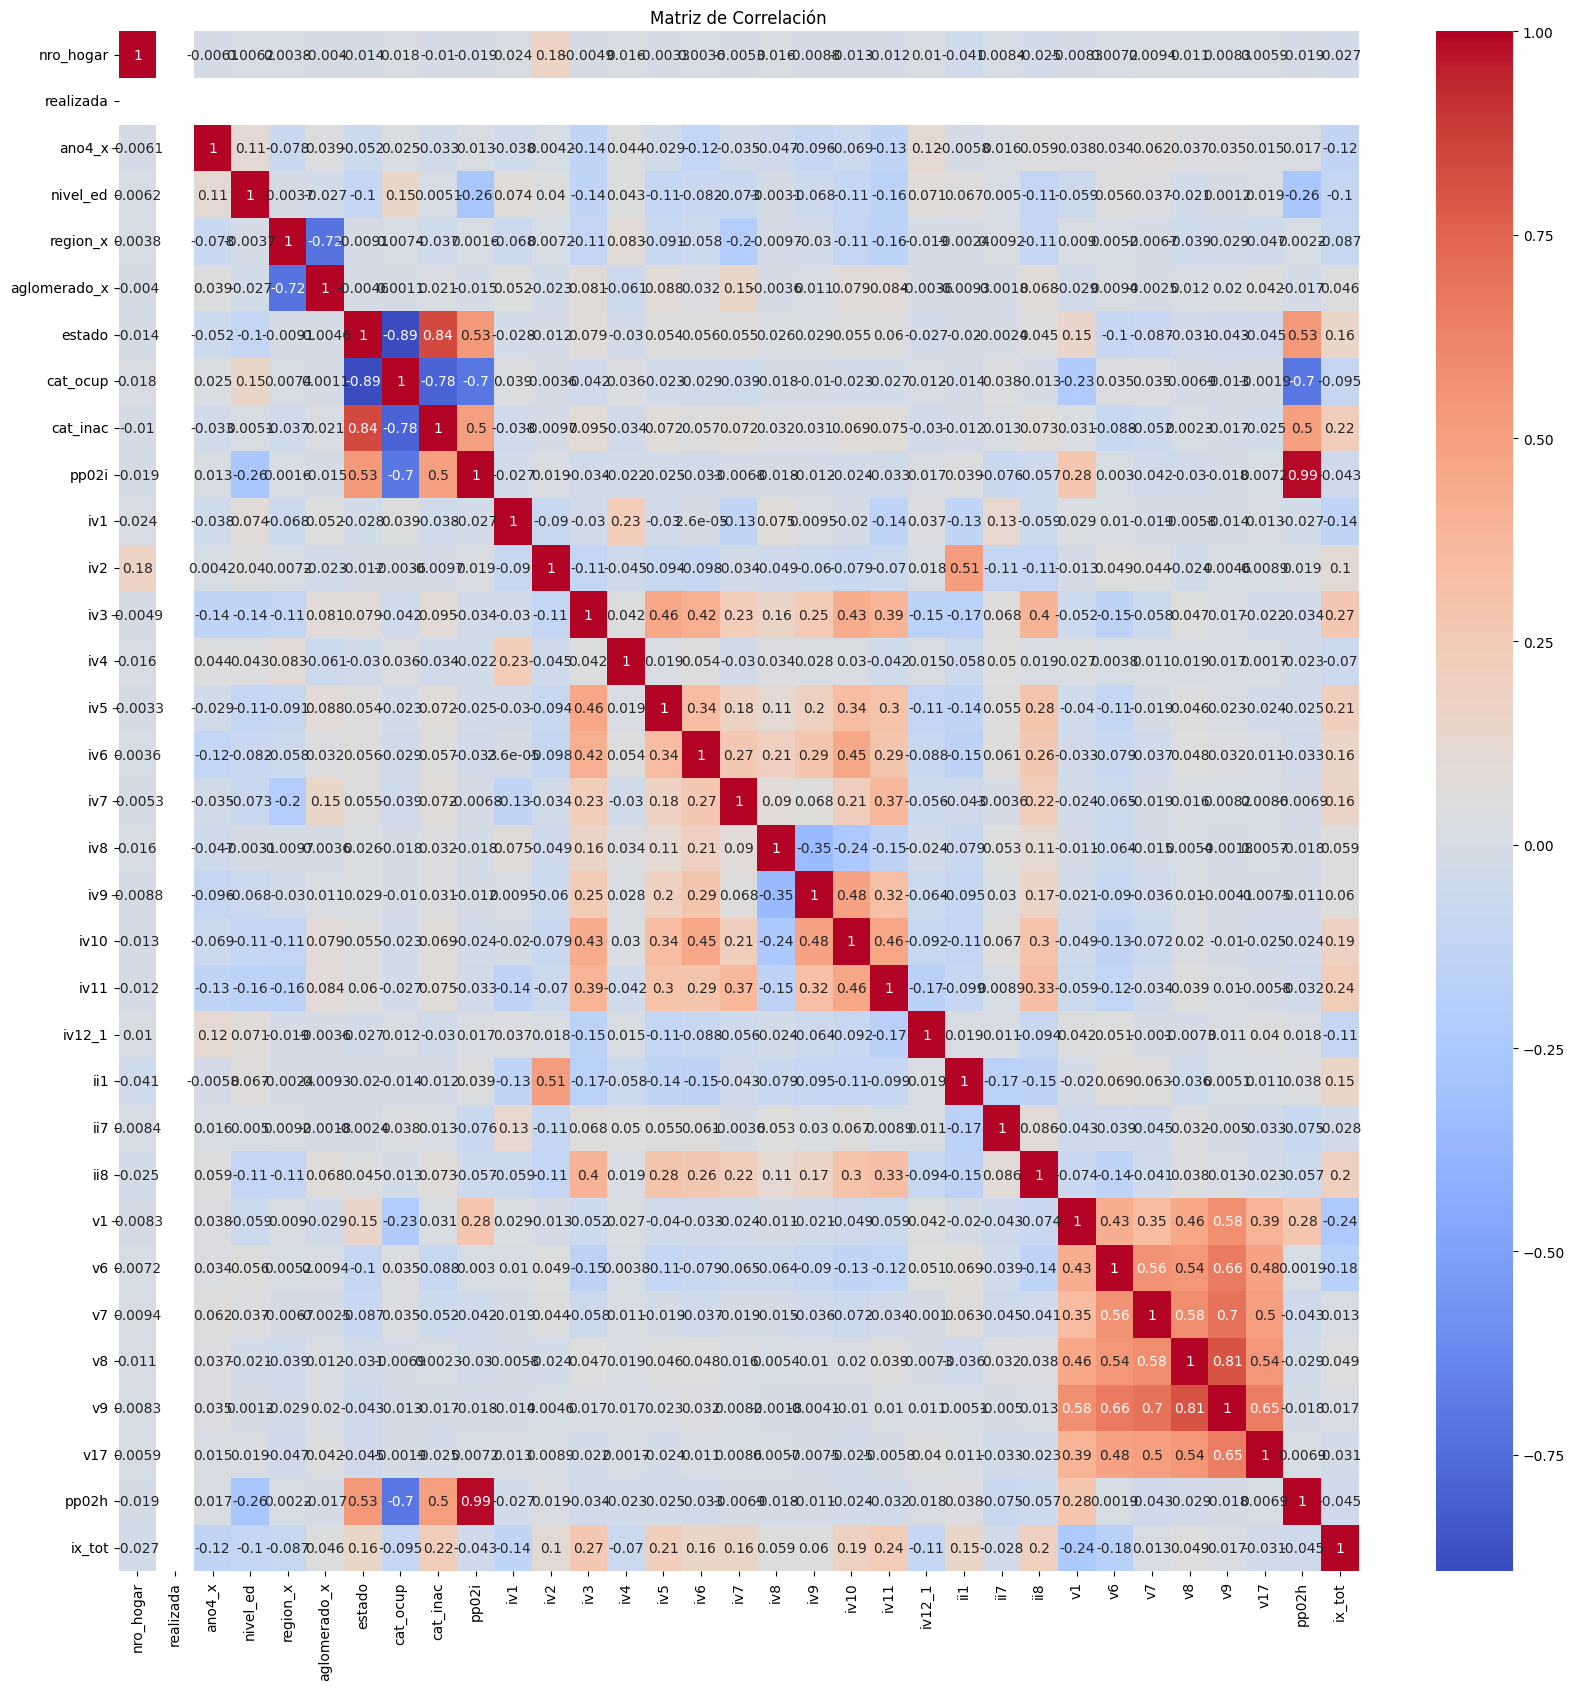

In [ ]:
# matriz de correlacion de mis variables elegidas
datos_apt.dtypes
datos_apt_filtrado = datos_apt.drop(columns=['codusu']) # no la tengo en cuenta para la matriz por ser object
correlation_matrix = datos_apt_filtrado.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')

plt.show()

In [ ]:
# segun la matriz de correlación, borro las variables v9 y cat_inac por estar >0.80 relacionadas con otra.

datos_apt = datos_apt.drop(columns=['v9','cat_inac','pp02i'])


In [ ]:
datos_apt.describe()

,nro_hogar,realizada,ano4_x,nivel_ed,region_x,aglomerado_x,estado,cat_ocup,iv1,iv2,iv3,iv4,iv5,iv6,iv7,iv8,iv9,iv10,iv11,iv12_1,ii1,ii7,ii8,v1,v6,v7,v8,v17,pp02h,ix_tot
count,22282.000000,22282.0,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000
mean,1.026479,1.0,2013.038686,3.615205,15.295306,26.205368,2.206355,1.299210,1.298761,3.114756,1.168836,3.064985,1.142133,1.057221,1.163764,1.005520,1.035679,1.097657,1.426712,1.929495,3.060632,1.917153,1.305448,1.128669,1.920743,1.938785,1.976394,1.912171,0.732430,3.899201
std,0.497396,0.0,9.953910,1.843390,19.901378,12.687770,1.144769,1.412565,0.535284,2.401187,0.400442,2.068656,0.373537,0.258429,0.403378,0.076479,0.215906,0.325694,0.702532,0.256528,1.477341,1.614322,0.528660,0.421266,0.386015,0.364515,0.313769,0.394359,0.956782,1.963442
min,1.000000,1.0,2004.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.0,2004.000000,2.000000,1.000000,32.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,1.000000,1.0,2004.000000,3.000000,1.000000,33.000000,3.000000,0.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,4.000000
75%,1.000000,1.0,2024.000000,5.000000,43.000000,33.000000,3.000000,3.000000,2.000000,4.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000
max,51.000000,1.0,2024.000000,7.000000,43.000000,34.000000,4.000000,4.000000,6.000000,99.000000,4.000000,9.000000,9.000000,3.000000,4.000000,2.000000,3.000000,3.000000,9.000000,2.000000,99.000000,9.000000,4.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,15.000000


In [ ]:
# variables categoricas a transformar en dummies por ser nominales (categorias sin orden)
## aglomerado
## cat_ocup
## iv1
## iv3
## iv4
## iv6
## iv7
## iv9
## iv10
## iv11
## ii7
## ii8

datos_onehot = pd.get_dummies(datos_apt, columns=['aglomerado_x','cat_ocup','iv1','iv3','iv4','iv4','iv7','iv9','iv10','iv11','ii7','ii8'])
datos_onehot.head()

,codusu,nro_hogar,realizada,ano4_x,nivel_ed,region_x,estado,iv2,iv5,iv6,iv8,iv12_1,ii1,v1,v6,v7,v8,v17,pp02h,ix_tot,aglomerado_x_2.0,aglomerado_x_3.0,aglomerado_x_32.0,aglomerado_x_33.0,aglomerado_x_34.0,cat_ocup_0.0,cat_ocup_1.0,cat_ocup_2.0,cat_ocup_3.0,cat_ocup_4.0,iv1_1.0,iv1_2.0,iv1_3.0,iv1_4.0,iv1_5.0,iv1_6.0,iv3_0.0,iv3_1.0,iv3_2.0,iv3_3.0,iv3_4.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv7_0.0,iv7_1.0,iv7_2.0,iv7_3.0,iv7_4.0,iv9_0.0,iv9_1.0,iv9_2.0,iv9_3.0,iv10_0.0,iv10_1.0,iv10_2.0,iv10_3.0,iv11_0.0,iv11_1.0,iv11_2.0,iv11_3.0,iv11_4.0,iv11_9.0,ii7_0.0,ii7_1.0,ii7_2.0,ii7_3.0,ii7_4.0,ii7_5.0,ii7_6.0,ii7_7.0,ii7_8.0,ii7_9.0,ii8_0.0,ii8_1.0,ii8_2.0,ii8_3.0,ii8_4.0
0,125098,1.0,1.0,2004.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
1,125397,1.0,1.0,2004.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
2,125515,1.0,1.0,2004.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
3,125558,1.0,1.0,2004.0,2.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,0.0,4.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
4,125558,1.0,1.0,2004.0,6.0,1.0,3.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
# analizo datos faltantes

print(datos_onehot.isna().sum())

codusu               0
nro_hogar            0
realizada            0
ano4_x               0
nivel_ed             0
region_x             0
estado               0
iv2                  0
iv5                  0
iv6                  0
iv8                  0
iv12_1               0
ii1                  0
v1                   0
v6                   0
v7                   0
v8                   0
v17                  0
pp02h                0
ix_tot               0
aglomerado_x_2.0     0
aglomerado_x_3.0     0
aglomerado_x_32.0    0
aglomerado_x_33.0    0
aglomerado_x_34.0    0
cat_ocup_0.0         0
cat_ocup_1.0         0
cat_ocup_2.0         0
cat_ocup_3.0         0
cat_ocup_4.0         0
iv1_1.0              0
iv1_2.0              0
iv1_3.0              0
iv1_4.0              0
iv1_5.0              0
iv1_6.0              0
iv3_0.0              0
iv3_1.0              0
iv3_2.0              0
iv3_3.0              0
iv3_4.0              0
iv4_0.0              0
iv4_1.0              0
iv4_2.0    

***EJ 4***

Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).

In [ ]:
# 3 variables nuevas

## Sin iniciativa: inactivo o desocupado y sin buscar trabajo
datos_onehot['sin_iniciativa'] = 0
datos_onehot.loc[((datos_onehot['estado'] ==  3) | (datos_onehot['estado'] ==  2)) & (datos_onehot['pp02h'] == 2), 'sin_iniciativa'] = 1
datos_onehot.head()

#datos_onehot['sin_iniciativa'].value_counts() #bien hay de ambos

,codusu,nro_hogar,realizada,ano4_x,nivel_ed,region_x,estado,iv2,iv5,iv6,iv8,iv12_1,ii1,v1,v6,v7,v8,v17,pp02h,ix_tot,aglomerado_x_2.0,aglomerado_x_3.0,aglomerado_x_32.0,aglomerado_x_33.0,aglomerado_x_34.0,cat_ocup_0.0,cat_ocup_1.0,cat_ocup_2.0,cat_ocup_3.0,cat_ocup_4.0,iv1_1.0,iv1_2.0,iv1_3.0,iv1_4.0,iv1_5.0,iv1_6.0,iv3_0.0,iv3_1.0,iv3_2.0,iv3_3.0,iv3_4.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv7_0.0,iv7_1.0,iv7_2.0,iv7_3.0,iv7_4.0,iv9_0.0,iv9_1.0,iv9_2.0,iv9_3.0,iv10_0.0,iv10_1.0,iv10_2.0,iv10_3.0,iv11_0.0,iv11_1.0,iv11_2.0,iv11_3.0,iv11_4.0,iv11_9.0,ii7_0.0,ii7_1.0,ii7_2.0,ii7_3.0,ii7_4.0,ii7_5.0,ii7_6.0,ii7_7.0,ii7_8.0,ii7_9.0,ii8_0.0,ii8_1.0,ii8_2.0,ii8_3.0,ii8_4.0,sin_iniciativa
0,125098,1.0,1.0,2004.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,1
1,125397,1.0,1.0,2004.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,0
2,125515,1.0,1.0,2004.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,1
3,125558,1.0,1.0,2004.0,2.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,0.0,4.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,0
4,125558,1.0,1.0,2004.0,6.0,1.0,3.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,1


In [ ]:
## creamos la categoria de ser un individuo 'trabajador de calidad' (significa que tiene alto nivel educativo y es trabajador patron o cuenta propia)
datos_onehot['trabajador_calidad'] = 0
datos_onehot.loc[(datos_onehot['nivel_ed'] == 5) | (datos_onehot['nivel_ed'] == 6) &
              ((datos_onehot['cat_ocup_2.0'] == True) | (datos_onehot['cat_ocup_1.0'] == True)),
              'trabajador_calidad'] = 1

#datos_onehot['trabajador_calidad'].value_counts() #bien hay de ambos
datos_onehot.head()

,codusu,nro_hogar,realizada,ano4_x,nivel_ed,region_x,estado,iv2,iv5,iv6,iv8,iv12_1,ii1,v1,v6,v7,v8,v17,pp02h,ix_tot,aglomerado_x_2.0,aglomerado_x_3.0,aglomerado_x_32.0,aglomerado_x_33.0,aglomerado_x_34.0,cat_ocup_0.0,cat_ocup_1.0,cat_ocup_2.0,cat_ocup_3.0,cat_ocup_4.0,iv1_1.0,iv1_2.0,iv1_3.0,iv1_4.0,iv1_5.0,iv1_6.0,iv3_0.0,iv3_1.0,iv3_2.0,iv3_3.0,iv3_4.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv7_0.0,iv7_1.0,iv7_2.0,iv7_3.0,iv7_4.0,iv9_0.0,iv9_1.0,iv9_2.0,iv9_3.0,iv10_0.0,iv10_1.0,iv10_2.0,iv10_3.0,iv11_0.0,iv11_1.0,iv11_2.0,iv11_3.0,iv11_4.0,iv11_9.0,ii7_0.0,ii7_1.0,ii7_2.0,ii7_3.0,ii7_4.0,ii7_5.0,ii7_6.0,ii7_7.0,ii7_8.0,ii7_9.0,ii8_0.0,ii8_1.0,ii8_2.0,ii8_3.0,ii8_4.0,sin_iniciativa,trabajador_calidad
0,125098,1.0,1.0,2004.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,1,0
1,125397,1.0,1.0,2004.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,0,0
2,125515,1.0,1.0,2004.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0
3,125558,1.0,1.0,2004.0,2.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,0.0,4.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0
4,125558,1.0,1.0,2004.0,6.0,1.0,3.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0


In [ ]:
## creo una categoria que sea si vive solo o no

datos_onehot['vive_solo'] = 0
datos_onehot.loc[datos_onehot['ix_tot'] == 1, 'vive_solo'] = 1
datos_onehot['vive_solo'].value_counts() #bien
datos_onehot.head()

,codusu,nro_hogar,realizada,ano4_x,nivel_ed,region_x,estado,iv2,iv5,iv6,iv8,iv12_1,ii1,v1,v6,v7,v8,v17,pp02h,ix_tot,aglomerado_x_2.0,aglomerado_x_3.0,aglomerado_x_32.0,aglomerado_x_33.0,aglomerado_x_34.0,cat_ocup_0.0,cat_ocup_1.0,cat_ocup_2.0,cat_ocup_3.0,cat_ocup_4.0,iv1_1.0,iv1_2.0,iv1_3.0,iv1_4.0,iv1_5.0,iv1_6.0,iv3_0.0,iv3_1.0,iv3_2.0,iv3_3.0,iv3_4.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv7_0.0,iv7_1.0,iv7_2.0,iv7_3.0,iv7_4.0,iv9_0.0,iv9_1.0,iv9_2.0,iv9_3.0,iv10_0.0,iv10_1.0,iv10_2.0,iv10_3.0,iv11_0.0,iv11_1.0,iv11_2.0,iv11_3.0,iv11_4.0,iv11_9.0,ii7_0.0,ii7_1.0,ii7_2.0,ii7_3.0,ii7_4.0,ii7_5.0,ii7_6.0,ii7_7.0,ii7_8.0,ii7_9.0,ii8_0.0,ii8_1.0,ii8_2.0,ii8_3.0,ii8_4.0,sin_iniciativa,trabajador_calidad,vive_solo
0,125098,1.0,1.0,2004.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,1,0,1
1,125397,1.0,1.0,2004.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,0,0,1
2,125515,1.0,1.0,2004.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,1
3,125558,1.0,1.0,2004.0,2.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,0.0,4.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0
4,125558,1.0,1.0,2004.0,6.0,1.0,3.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,0


***EJ 5***

Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

In [ ]:
datos_onehot.describe()

,nro_hogar,realizada,ano4_x,nivel_ed,region_x,estado,iv2,iv5,iv6,iv8,iv12_1,ii1,v1,v6,v7,v8,v17,pp02h,ix_tot,sin_iniciativa,trabajador_calidad,vive_solo
count,22282.000000,22282.0,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000,22282.000000
mean,1.026479,1.0,2013.038686,3.615205,15.295306,2.206355,3.114756,1.142133,1.057221,1.005520,1.929495,3.060632,1.128669,1.920743,1.938785,1.976394,1.912171,0.732430,3.899201,0.359663,0.140652,0.071986
std,0.497396,0.0,9.953910,1.843390,19.901378,1.144769,2.401187,0.373537,0.258429,0.076479,0.256528,1.477341,0.421266,0.386015,0.364515,0.313769,0.394359,0.956782,1.963442,0.479912,0.347670,0.258471
min,1.000000,1.0,2004.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.0,2004.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.0,2004.000000,3.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000
75%,1.000000,1.0,2024.000000,5.000000,43.000000,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,1.000000,0.000000,0.000000
max,51.000000,1.0,2024.000000,7.000000,43.000000,4.000000,99.000000,9.000000,3.000000,2.000000,2.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,15.000000,1.000000,1.000000,1.000000


Análisis de variable 1: SIN INICIATIVA

In [ ]:
# Tabla de frecuencia de personas sin iniciativa
print(datos_onehot['sin_iniciativa'].value_counts())

# Moda
moda = datos_onehot['sin_iniciativa'].mode()
print("Valor más frecuente:", moda[0])

sin_iniciativa
0    14268
1     8014
Name: count, dtype: int64
Valor más frecuente: 0


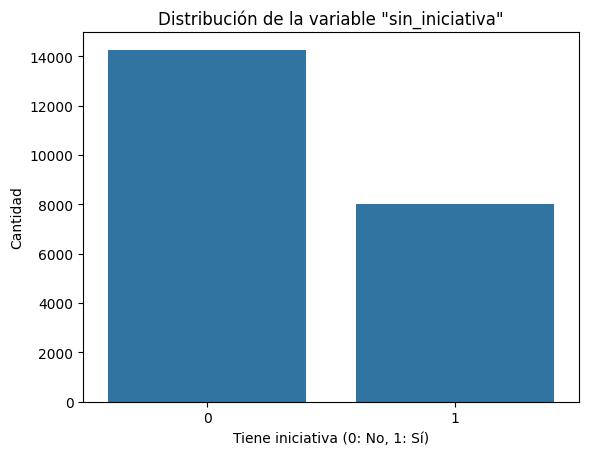

In [ ]:
# gráfico de barras: distribución
sns.countplot(x='sin_iniciativa', data=datos_onehot)
plt.xlabel('Tiene iniciativa (0: No, 1: Sí)')
plt.ylabel('Cantidad')
plt.title('Distribución de la variable "sin_iniciativa"')
plt.show()


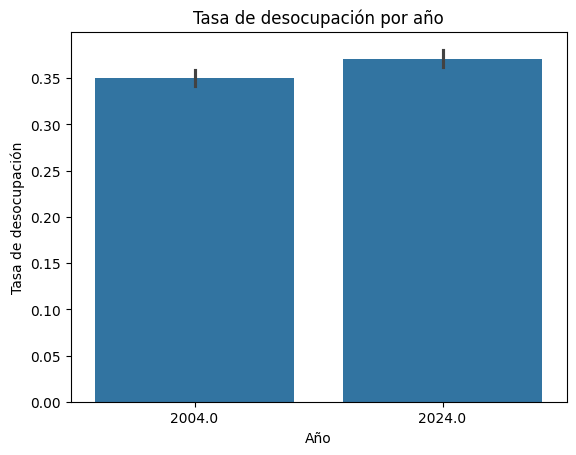

In [ ]:
#Tasa de personas sin iniciativa por año 2004 o 2024
sns.barplot(x='ano4_x', y='sin_iniciativa', data=datos_onehot, estimator=np.mean)
plt.xlabel('Año')
plt.ylabel('Tasa de desocupación')
plt.title('Tasa de desocupación por año')
plt.show()

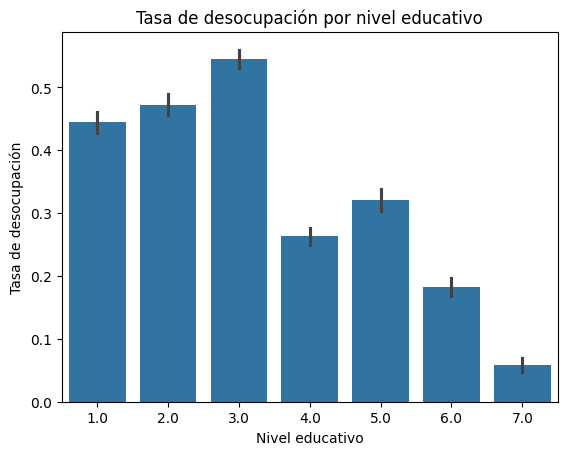

In [ ]:
#Tasa de personas sin iniciativa por nivel educativo
sns.barplot(x='nivel_ed', y='sin_iniciativa', data=datos_onehot, estimator=np.mean)
plt.xlabel('Nivel educativo')
plt.ylabel('Tasa de desocupación')
plt.title('Tasa de desocupación por nivel educativo')
plt.show()

In [ ]:
# hacemos anova para ver si las diferencias por nivel ed son significativas

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm




# Verificar normalidad (ejemplo con Shapiro-Wilk)
for nivel in datos_onehot['nivel_ed'].unique():
    print(f"Nivel educativo {nivel}:")
    print(stats.shapiro(datos_onehot[datos_onehot['nivel_ed'] == nivel]['sin_iniciativa']))

# Verificar homogeneidad de varianzas (ejemplo con Levene)
print(stats.levene(datos_onehot['sin_iniciativa'], datos_onehot['nivel_ed']))

# Realizar el ANOVA
model = smf.ols('sin_iniciativa ~ nivel_ed', data=datos_onehot).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# hay dif significativa por el bajo pvalor


Nivel educativo 3.0:
ShapiroResult(statistic=0.6335924127784778, pvalue=1.62505664405737e-69)
Nivel educativo 2.0:
ShapiroResult(statistic=0.6355299896267863, pvalue=1.1660966499079455e-66)
Nivel educativo 6.0:
ShapiroResult(statistic=0.4691725826045593, pvalue=4.735002936225284e-67)
Nivel educativo 5.0:
ShapiroResult(statistic=0.588125288875832, pvalue=9.870029507861608e-62)
Nivel educativo 4.0:
ShapiroResult(statistic=0.5501035389872737, pvalue=3.396587005537738e-72)
Nivel educativo 1.0:
ShapiroResult(statistic=0.6320821757513309, pvalue=2.6537713571831626e-65)
Nivel educativo 7.0:
ShapiroResult(statistic=0.24633011851924147, pvalue=2.0616667024400105e-64)
LeveneResult(statistic=20582.093940653525, pvalue=0.0)
               sum_sq       df            F  PR(>F)
nivel_ed   347.081174      1.0  1616.226066     0.0
Residual  4784.583488  22280.0          NaN     NaN


In [ ]:
# hago tuckey para ver específicamente en qué parejas hay dif significativa
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_hsd = pairwise_tukeyhsd(endog=datos_onehot['sin_iniciativa'], groups=datos_onehot['nivel_ed'], alpha=0.05)
print(tukey_hsd)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0   0.0284 0.1187 -0.0035  0.0603  False
   1.0    3.0   0.1014    0.0  0.0704  0.1324   True
   1.0    4.0  -0.1801    0.0 -0.2115 -0.1487   True
   1.0    5.0  -0.1235    0.0 -0.1583 -0.0886   True
   1.0    6.0   -0.262    0.0 -0.2966 -0.2274   True
   1.0    7.0  -0.3862    0.0 -0.4256 -0.3467   True
   2.0    3.0    0.073    0.0  0.0426  0.1034   True
   2.0    4.0  -0.2085    0.0 -0.2393 -0.1776   True
   2.0    5.0  -0.1518    0.0 -0.1862 -0.1175   True
   2.0    6.0  -0.2904    0.0 -0.3245 -0.2563   True
   2.0    7.0  -0.4145    0.0 -0.4535 -0.3756   True
   3.0    4.0  -0.2815    0.0 -0.3114 -0.2516   True
   3.0    5.0  -0.2248    0.0 -0.2583 -0.1914   True
   3.0    6.0  -0.3634    0.0 -0.3966 -0.3301   True
   3.0    7.0  -0.4876    0.0 -0.5258 -0.4493   True
   4.0    5.0   0.0566    0.0  0.0227  0.0906 

Análisis de variable 2: TRABAJADOR DE CALIDAD

In [ ]:
# Tabla de frecuencia de trabajadores de calidad
print(datos_onehot['trabajador_calidad'].value_counts())

# Moda
moda2 = datos_onehot['trabajador_calidad'].mode()
print("Valor más frecuente:", moda2[0])

trabajador_calidad
0    19148
1     3134
Name: count, dtype: int64
Valor más frecuente: 0


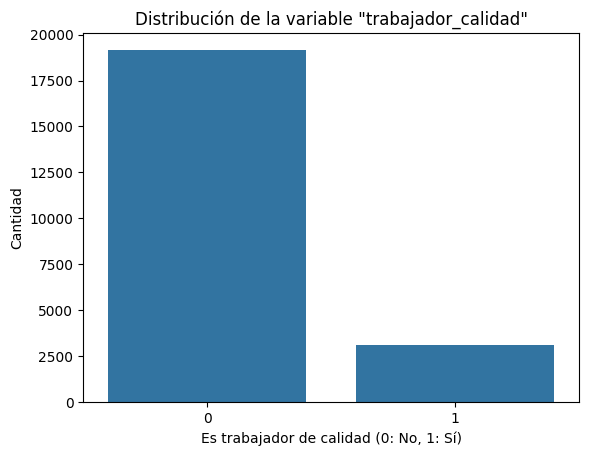

In [ ]:
# gráfico de barras: distribución
sns.countplot(x='trabajador_calidad', data=datos_onehot)
plt.xlabel('Es trabajador de calidad (0: No, 1: Sí)')
plt.ylabel('Cantidad')
plt.title('Distribución de la variable "trabajador_calidad"')
plt.show()

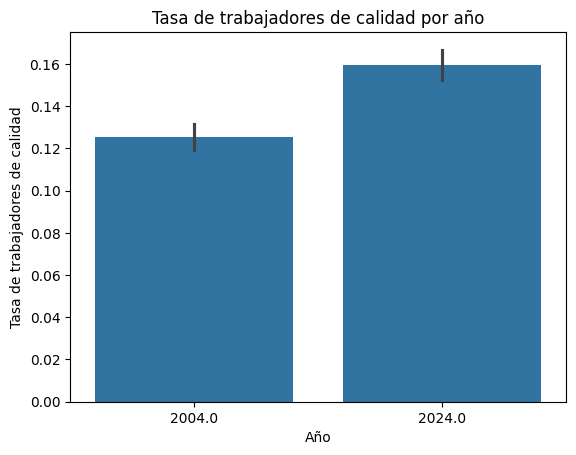

In [ ]:
#Tasa de trabajadores de calidad por año 2004 o 2024
sns.barplot(x='ano4_x', y='trabajador_calidad', data=datos_onehot, estimator=np.mean)
plt.xlabel('Año')
plt.ylabel('Tasa de trabajadores de calidad')
plt.title('Tasa de trabajadores de calidad por año')
plt.show()

In [ ]:
# chi cuadrado para ver si la diferencia entre 2004 y 2024 es significativa

from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(datos_onehot['ano4_x'], datos_onehot['trabajador_calidad'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Interpretar los resultados
print("p-value:", p)
if p < 0.05:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en la proporción de trabajadores de calidad entre 2004 y 2024.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para concluir que existe una diferencia significativa.")


p-value: 4.3056366321734354e-13
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en la proporción de trabajadores de calidad entre 2004 y 2024.


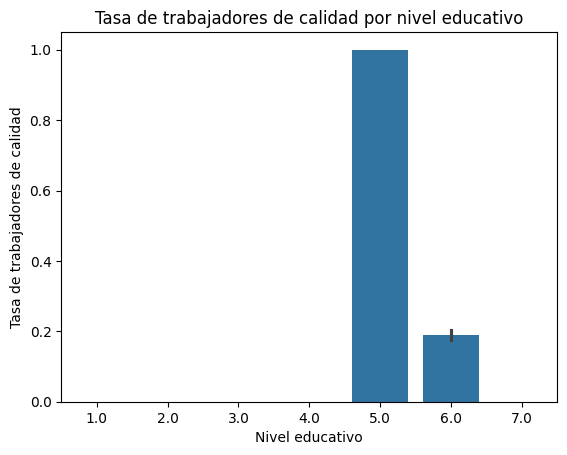

In [ ]:
#Tasa de trabajadores de calidad por nivel educativo
sns.barplot(x='nivel_ed', y='trabajador_calidad', data=datos_onehot, estimator=np.mean)
plt.xlabel('Nivel educativo')
plt.ylabel('Tasa de trabajadores de calidad')
plt.title('Tasa de trabajadores de calidad por nivel educativo')
plt.show()

# claro porq ser trabajador de calidad implica tener nivel ed alto

Estadísticas decsriptivas de variable 3:

In [ ]:
# Tabla de frecuencia de cantidad de personas por hogar
# (ix_tot cantidad de miembros del hogar)
print(datos_onehot['ix_tot'].value_counts())

# Moda
moda = datos_onehot['ix_tot'].mode()
print("Valor más frecuente:", moda[0])

ix_tot
4.0     5236
3.0     4518
2.0     4000
5.0     3240
6.0     1650
1.0     1604
7.0      994
8.0      408
9.0      270
10.0     180
12.0      72
11.0      55
13.0      26
15.0      15
14.0      14
Name: count, dtype: int64
Valor más frecuente: 4.0


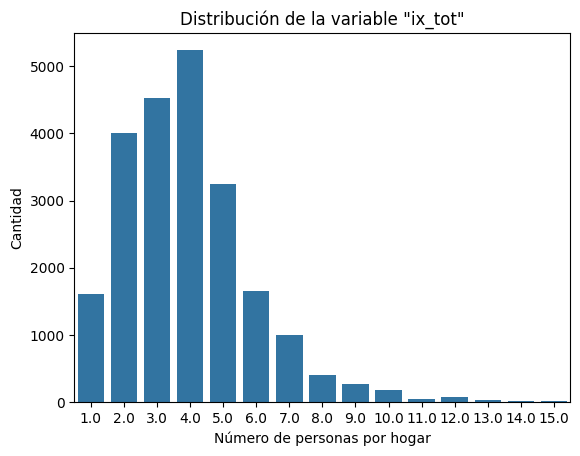

In [ ]:
# gráfico de barras: distribución
sns.countplot(x='ix_tot', data=datos_onehot)
plt.xlabel('Número de personas por hogar')
plt.ylabel('Cantidad')
plt.title('Distribución de la variable "ix_tot"')
plt.show()

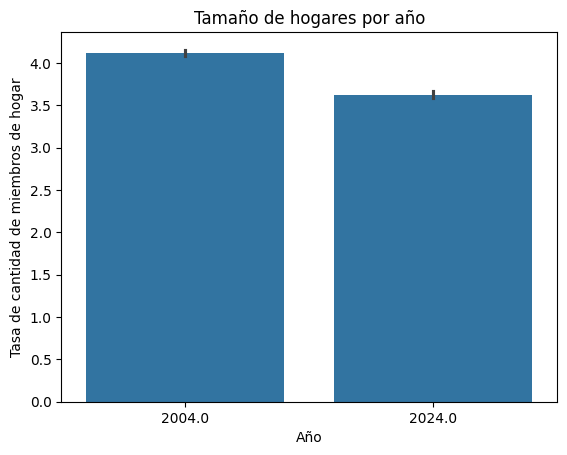

In [ ]:
#tamaño de hogar por año 2004 o 2024
sns.barplot(x='ano4_x', y='ix_tot', data=datos_onehot, estimator=np.mean)
plt.xlabel('Año')
plt.ylabel('Cantidad de miembros de hogar')
plt.title('Tamaño de hogares por año')
plt.show()

In [ ]:
# hacemos un t test para ver si la dif es significativa

# Filtrar los datos para los años 2004 y 2024
onehot_2004 = datos_onehot[datos_onehot['ano4_x'] == 2004]
onehot_2024 = datos_onehot[datos_onehot['ano4_x'] == 2024]

# Realizar la prueba t
t_statistic, p_value = stats.ttest_ind(onehot_2004['ix_tot'], onehot_2024['ix_tot'])

# Imprimir los resultados
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("La diferencia en el tamaño de los hogares entre 2004 y 2024 es estadísticamente significativa.")
else:
    print("No se encontró una diferencia estadísticamente significativa en el tamaño de los hogares.")


t-statistic: 18.800983426049296
p-value: 2.9916961002448443e-78
La diferencia en el tamaño de los hogares entre 2004 y 2024 es estadísticamente significativa.


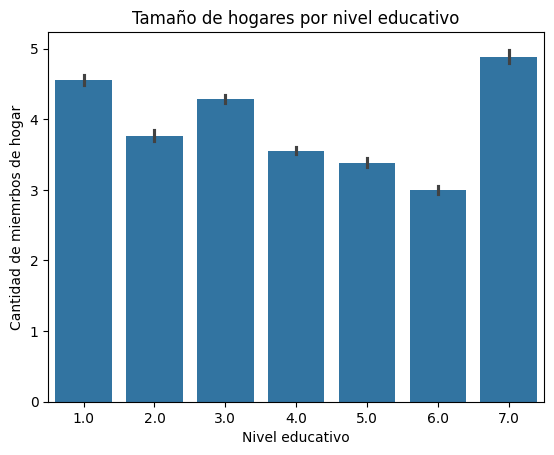

In [ ]:
#tamaño de hogar por nivel educativo
sns.barplot(x='nivel_ed', y='ix_tot', data=datos_onehot, estimator=np.mean)
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad de miemrbos de hogar')
plt.title('Tamaño de hogares por nivel educativo')
plt.show()

In [ ]:
# anova para chequear diferencias significativas
from statsmodels.formula.api import ols

model_tamaño = ols('ix_tot ~ nivel_ed', data=datos_onehot).fit()
anova_tamaño = sm.stats.anova_lm(model_tamaño, typ=2)
anova_tamaño


# pvalor muy bajo 2.399860e-55: hay dif significativa entre las medias de al menos un grupo



,sum_sq,df,F,PR(>F)
nivel_ed,941.56456,1.0,246.934202,2.399860e-55
Residual,84954.04122,22280.0,NaN,NaN


In [ ]:
# tuckey para ver entre cuales

tukey_tamaño = pairwise_tukeyhsd(endog=datos_onehot['ix_tot'], groups=datos_onehot['nivel_ed'], alpha=0.05)
print(tukey_tamaño)

#

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   1.0    2.0  -0.7881   0.0 -0.9196 -0.6567   True
   1.0    3.0  -0.2734   0.0  -0.401 -0.1457   True
   1.0    4.0  -1.0017   0.0 -1.1313 -0.8722   True
   1.0    5.0  -1.1701   0.0 -1.3138 -1.0264   True
   1.0    6.0  -1.5646   0.0 -1.7073 -1.4219   True
   1.0    7.0   0.3292   0.0  0.1667  0.4917   True
   2.0    3.0   0.5148   0.0  0.3896    0.64   True
   2.0    4.0  -0.2136   0.0 -0.3408 -0.0864   True
   2.0    5.0   -0.382   0.0 -0.5235 -0.2405   True
   2.0    6.0  -0.7765   0.0  -0.917 -0.6359   True
   2.0    7.0   1.1173   0.0  0.9567   1.278   True
   3.0    4.0  -0.7284   0.0 -0.8516 -0.6051   True
   3.0    5.0  -0.8967   0.0 -1.0348 -0.7587   True
   3.0    6.0  -1.2912   0.0 -1.4282 -1.1542   True
   3.0    7.0   0.6026   0.0   0.445  0.7601   True
   4.0    5.0  -0.1684 0.007 -0.3082 -0.0286   True
   4.0    6.

# Parte II: Clasificación y regularización

El objetivo de esta parte del trabajo es nuevamente intentar predecir si una persona está desocupada o no. Esta vez utilizando distintas variables de características individuales y del hogar del encuestado. A su vez, incluiremos ejercicios de regularización y de validación cruzada.

***EJ 1***

Paracadaaño,partan la base respondieron en una basedepruebayuna de entrenamiento (X_train, y_train, X_test, y_test) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
## traigo la creacion de la base respondieron del tp3 pero la creo sobre mi dataframe de ahora

respondieron = datos_onehot[datos_onehot['estado'] != 0]

respondieron['pea'] = (respondieron['estado'].isin([1, 2])).astype(int)
respondieron['desocupado'] = (respondieron['estado'] == 2).astype(int)
respondieron.head()
#respondieron['estado'].value_counts()
#respondieron['respondieron'].value_counts() chequeo
#respondieron['desocupado'].value_counts() #bien


<ipython-input-33-24d9480d94b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pea'] = (respondieron['estado'].isin([1, 2])).astype(int)
<ipython-input-33-24d9480d94b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = (respondieron['estado'] == 2).astype(int)


,codusu,nro_hogar,realizada,ano4_x,nivel_ed,region_x,estado,iv2,iv5,iv6,iv8,iv12_1,ii1,v1,v6,v7,v8,v17,pp02h,ix_tot,aglomerado_x_2.0,aglomerado_x_3.0,aglomerado_x_32.0,aglomerado_x_33.0,aglomerado_x_34.0,cat_ocup_0.0,cat_ocup_1.0,cat_ocup_2.0,cat_ocup_3.0,cat_ocup_4.0,iv1_1.0,iv1_2.0,iv1_3.0,iv1_4.0,iv1_5.0,iv1_6.0,iv3_0.0,iv3_1.0,iv3_2.0,iv3_3.0,iv3_4.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv7_0.0,iv7_1.0,iv7_2.0,iv7_3.0,iv7_4.0,iv9_0.0,iv9_1.0,iv9_2.0,iv9_3.0,iv10_0.0,iv10_1.0,iv10_2.0,iv10_3.0,iv11_0.0,iv11_1.0,iv11_2.0,iv11_3.0,iv11_4.0,iv11_9.0,ii7_0.0,ii7_1.0,ii7_2.0,ii7_3.0,ii7_4.0,ii7_5.0,ii7_6.0,ii7_7.0,ii7_8.0,ii7_9.0,ii8_0.0,ii8_1.0,ii8_2.0,ii8_3.0,ii8_4.0,sin_iniciativa,trabajador_calidad,vive_solo,pea,desocupado
0,125098,1.0,1.0,2004.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,1,0,1,0,0
1,125397,1.0,1.0,2004.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,0,0,1,1,0
2,125515,1.0,1.0,2004.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,1,0,0
3,125558,1.0,1.0,2004.0,2.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,0.0,4.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,1,0
4,125558,1.0,1.0,2004.0,6.0,1.0,3.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,1,0,0,0,0


In [ ]:
# armo train y test
print('Columnas:',respondieron.columns)
num_filas = respondieron.shape[0]
print("Cantidad de filas:", num_filas)

columnas_a_analizar = ['codusu', 'nro_hogar', 'realizada', 'ano4_x', 'nivel_ed', 'region_x',
       'estado', 'iv2', 'iv5', 'iv6', 'iv8', 'iv12_1', 'ii1', 'v1',
       'v6', 'v7', 'v8', 'v17', 'ix_tot', 'aglomerado_x_2.0',
       'aglomerado_x_3.0', 'aglomerado_x_32.0', 'aglomerado_x_33.0',
       'aglomerado_x_34.0', 'cat_ocup_0.0', 'cat_ocup_1.0', 'cat_ocup_2.0',
       'cat_ocup_3.0', 'cat_ocup_4.0', 'iv1_1.0', 'iv1_2.0', 'iv1_3.0',
       'iv1_4.0', 'iv1_5.0', 'iv1_6.0', 'iv3_0.0', 'iv3_1.0', 'iv3_2.0',
       'iv3_3.0', 'iv3_4.0', 'iv4_0.0', 'iv4_1.0', 'iv4_2.0', 'iv4_3.0',
       'iv4_4.0', 'iv4_5.0', 'iv4_6.0', 'iv4_7.0', 'iv4_9.0', 'iv4_0.0',
       'iv4_1.0', 'iv4_2.0', 'iv4_3.0', 'iv4_4.0', 'iv4_5.0', 'iv4_6.0',
       'iv4_7.0', 'iv4_9.0', 'iv7_0.0', 'iv7_1.0', 'iv7_2.0', 'iv7_3.0',
       'iv7_4.0', 'iv9_0.0', 'iv9_1.0', 'iv9_2.0', 'iv9_3.0', 'iv10_0.0',
       'iv10_1.0', 'iv10_2.0', 'iv10_3.0', 'iv11_0.0', 'iv11_1.0', 'iv11_2.0',
       'iv11_3.0', 'iv11_4.0', 'iv11_9.0', 'ii7_0.0', 'ii7_1.0', 'ii7_2.0',
       'ii7_3.0', 'ii7_4.0', 'ii7_5.0', 'ii7_6.0', 'ii7_7.0', 'ii7_8.0',
       'ii7_9.0', 'ii8_0.0', 'ii8_1.0', 'ii8_2.0', 'ii8_3.0', 'ii8_4.0',
       'sin_iniciativa', 'trabajador_calidad', 'vive_solo', 'pea',
       'desocupado']

# Filtrar el DataFrame para conservar solo esas columnas
respondieron_entreno = respondieron[columnas_a_analizar]

valores_unicos = respondieron_entreno['desocupado'].unique()
print('Valores únicos:', valores_unicos)

Columnas: Index(['codusu', 'nro_hogar', 'realizada', 'ano4_x', 'nivel_ed', 'region_x',
       'estado', 'iv2', 'iv5', 'iv6', 'iv8', 'iv12_1', 'ii1', 'v1', 'v6', 'v7',
       'v8', 'v17', 'pp02h', 'ix_tot', 'aglomerado_x_2.0', 'aglomerado_x_3.0',
       'aglomerado_x_32.0', 'aglomerado_x_33.0', 'aglomerado_x_34.0',
       'cat_ocup_0.0', 'cat_ocup_1.0', 'cat_ocup_2.0', 'cat_ocup_3.0',
       'cat_ocup_4.0', 'iv1_1.0', 'iv1_2.0', 'iv1_3.0', 'iv1_4.0', 'iv1_5.0',
       'iv1_6.0', 'iv3_0.0', 'iv3_1.0', 'iv3_2.0', 'iv3_3.0', 'iv3_4.0',
       'iv4_0.0', 'iv4_1.0', 'iv4_2.0', 'iv4_3.0', 'iv4_4.0', 'iv4_5.0',
       'iv4_6.0', 'iv4_7.0', 'iv4_9.0', 'iv4_0.0', 'iv4_1.0', 'iv4_2.0',
       'iv4_3.0', 'iv4_4.0', 'iv4_5.0', 'iv4_6.0', 'iv4_7.0', 'iv4_9.0',
       'iv7_0.0', 'iv7_1.0', 'iv7_2.0', 'iv7_3.0', 'iv7_4.0', 'iv9_0.0',
       'iv9_1.0', 'iv9_2.0', 'iv9_3.0', 'iv10_0.0', 'iv10_1.0', 'iv10_2.0',
       'iv10_3.0', 'iv11_0.0', 'iv11_1.0', 'iv11_2.0', 'iv11_3.0', 'iv11_4.0',
       'iv11_9.

In [ ]:
# filtramos la base por año para resolver para cada año
respondieron_2004 = respondieron_entreno.loc[respondieron_entreno['ano4_x'] == 2004.0]
respondieron_2024 = respondieron_entreno.loc[respondieron_entreno['ano4_x'] == 2024.0]



In [ ]:
from sklearn.model_selection import train_test_split

#········· 2004
X_2004 = respondieron_2004.drop(columns=['desocupado','estado','codusu','nro_hogar','realizada'])  # Variables independientes
y_2004 = respondieron_2004['desocupado']  # Variable dependiente


# Divido en conjuntos de entrenamiento y prueba
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)

#········· 2024
X_2024 = respondieron_2024.drop(columns=['desocupado','estado','codusu','nro_hogar','realizada'])  # Variables independientes
y_2024 = respondieron_2024['desocupado']  # Variable dependiente

# Divido en conjuntos de entrenamiento y prueba
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)


***EJ 2***

Expliquen brevemente cómo elegirían λ por validación cruzada (en Python es alpha). Detallen por qué no usarían el conjunto de prueba (test) para su elección.

In [ ]:
# RTA: Si utilizamos el conjunto de prueba para elegir el hiperparámetro λ,
# estaríamos "filtrando" los datos y obtendríamos una estimación sesgada del
# rendimiento del modelo en nuevos datos, es decir, generamos un sobreajuste a
# los datos de prueba.

In [ ]:
# para elegir el mejor delta, hacemos cross validation con 5 folds y el que tenga menor MSE es el elegido

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
import numpy as np

# Ejemplo con el conjunto de datos de 2004
#lista de valores para lambda (alpha)
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Crear un objeto GridSearchCV
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid.fit(X_train_2004, y_train_2004)

# Obtener el mejor valor de alpha y el mejor estimador
print("Mejor valor de alpha:", grid.best_params_)
print("Mejor estimador:", grid.best_estimator_)

# Evaluar el modelo en el conjunto de prueba
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_2004)
mse = np.mean((y_test_2004 - y_pred) ** 2)
print("MSE en el conjunto de prueba:", mse)

# PARA 2004, segun esta validacion cruzada, el mejor conjunto de datos de train y test es el que da un MSE = 0.04, con un delta (alpha) de 1

Mejor valor de alpha: {'alpha': 1}
Mejor estimador: Ridge(alpha=1)
MSE en el conjunto de prueba: 0.04576157546663853


In [ ]:
# Valores de lambda a evaluar
param_grid2024 = {'alpha': [0.1, 1, 10, 100]}

# Crear un objeto GridSearchCV
grid2024 = GridSearchCV(Ridge(), param_grid2024, cv=10, scoring='neg_mean_squared_error')

# Ajustar el modelo utilizando validación cruzada
grid2024.fit(X_train_2024, y_train_2024)

# Obtener el mejor valor de lambda y el mejor estimador
print("Mejor valor de alpha (lambda):", grid2024.best_params_['alpha'])
print("Mejor estimador:", grid2024.best_estimator_)

# Evaluar el modelo en el conjunto de prueba
best_model2024 = grid2024.best_estimator_
y_pred2024 = best_model2024.predict(X_test_2024)
mse2024 = np.mean((y_test_2024 - y_pred2024) ** 2)
print("MSE en el conjunto de prueba:", mse2024)

# PARA 2024, segun esta validacion cruzada, el mejor conjunto de datos de train y test es el que da un MSE = 0.029, con un delta (alpha) de 1

Mejor valor de alpha (lambda): 1
Mejor estimador: Ridge(alpha=1)
MSE en el conjunto de prueba: 0.029502620991466708


***EJ 3***

En validación cruzada, ¿cuáles son las implicancias de usar un k muy
 pequeño o uno muy grande? Cuando k = n (con n el número de
 muestras), ¿cuántas veces se estima el modelo?

***EJ 4***

Para regresión logística, implementen la penalidad, L1 como la de
 LASSO y L2 comola de Ridge con
 (como en la Tutorial 10), usando
 λ = 1
 la opción penalty y reporten la matriz de confusión, la curva ROC, los
 valores de AUC y de Accuracy para cada año. ¿Cómo cambiaron los
 resultados con respecto al TP3? ¿La performance de regresión logística
 con regularización es mejor o peor?

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

######### PENALIZACIONES PARA 2004 #######

# Suponiendo que tienes un DataFrame llamado 'data' con las columnas 'features' y 'target'

# armo los modelos con ambas penalizaciones
model_l1_2004 = LogisticRegression(penalty='l1', C=1, solver='liblinear')
model_l2_2004 = LogisticRegression(penalty='l2', C=1, solver='liblinear')

# Entrenar los modelos
model_l1_2004.fit(X_train_2004, y_train_2004)
model_l2_2004.fit(X_train_2004, y_train_2004)

# Hacer predicciones
y_pred_l1_2004 = model_l1_2004.predict(X_test_2004)
y_pred_l2_2004 = model_l2_2004.predict(X_test_2004)

# Probabilidades de pertenecer a la clase positiva
y_prob_l1_2004 = model_l1_2004.predict_proba(X_test_2004)[:, 1]
y_prob_l2_2004 = model_l2_2004.predict_proba(X_test_2004)[:, 1]



Matriz de confusión L1:
 [[3384    7]
 [ 169  100]]
Matriz de confusión L2:
 [[3386    5]
 [ 173   96]]
AUC L1: 0.8933120582692651
AUC L2: 0.8933263098580432
Accuracy L1: 0.9519125683060109
Accuracy L2: 0.9513661202185792


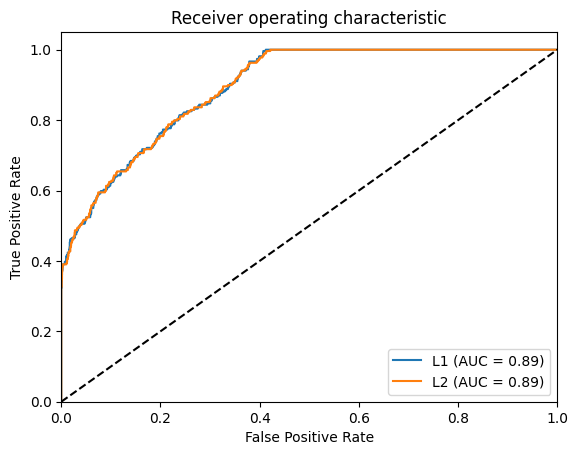

In [ ]:
# Matriz de confusión
conf_matrix_l1_2004 = confusion_matrix(y_test_2004, y_pred_l1_2004)
conf_matrix_l2_2004 = confusion_matrix(y_test_2004, y_pred_l2_2004)

# Curva ROC
fpr_l1_2004, tpr_l1_2004, _ = roc_curve(y_test_2004, y_prob_l1_2004)
roc_auc_l1_2004 = auc(fpr_l1_2004, tpr_l1_2004)
fpr_l2_2004, tpr_l2_2004, _ = roc_curve(y_test_2004, y_prob_l2_2004)
roc_auc_l2_2004 = auc(fpr_l2_2004, tpr_l2_2004)

# Accuracy
accuracy_l1_2004 = model_l1_2004.score(X_test_2004, y_test_2004)
accuracy_l2_2004 = model_l2_2004.score(X_test_2004, y_test_2004)

# Imprimir resultados
print("Matriz de confusión L1:\n", conf_matrix_l1_2004)
print("Matriz de confusión L2:\n", conf_matrix_l2_2004)
print("AUC L1:", roc_auc_l1_2004)
print("AUC L2:", roc_auc_l2_2004)
print("Accuracy L1:", accuracy_l1_2004)
print("Accuracy L2:", accuracy_l2_2004)

# Graficar las curvas ROC
plt.plot(fpr_l1_2004, tpr_l1_2004, label='L1 (AUC = %0.2f)' % roc_auc_l1_2004)
plt.plot(fpr_l2_2004, tpr_l2_2004, label='L2 (AUC = %0.2f)' % roc_auc_l2_2004)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Como se diferencian los resultados con el tp3 (comparando el modelo de regresion logistica)
##### 2004 ####
# Matriz de confusion de tp3: [[2087  10]
#                               [27  128]]
# AUC: 0.995
# Accuracy: 0.983


In [ ]:
######### PENALIZACIONES PARA 2024 #######

# armo los modelos con ambas penalizaciones
model_l1_2024 = LogisticRegression(penalty='l1', C=1, solver='liblinear')
model_l2_2024 = LogisticRegression(penalty='l2', C=1, solver='liblinear')

# Entrenar los modelos
model_l1_2024.fit(X_train_2024, y_train_2024)
model_l2_2024.fit(X_train_2024, y_train_2024)

# Hacer predicciones
y_pred_l1_2024 = model_l1_2024.predict(X_test_2024)
y_pred_l2_2024 = model_l2_2024.predict(X_test_2024)

# Probabilidades de pertenecer a la clase positiva
y_prob_l1_2024 = model_l1_2024.predict_proba(X_test_2024)[:, 1]
y_prob_l2_2024 = model_l2_2024.predict_proba(X_test_2024)[:, 1]

Matriz de confusión L1:
 [[2889    1]
 [  90   29]]
Matriz de confusión L2:
 [[2889    1]
 [  92   27]]
AUC L1: 0.8791166293507022
AUC L2: 0.8769198336774157
Accuracy L1: 0.969757394483217
Accuracy L2: 0.9690927218344965


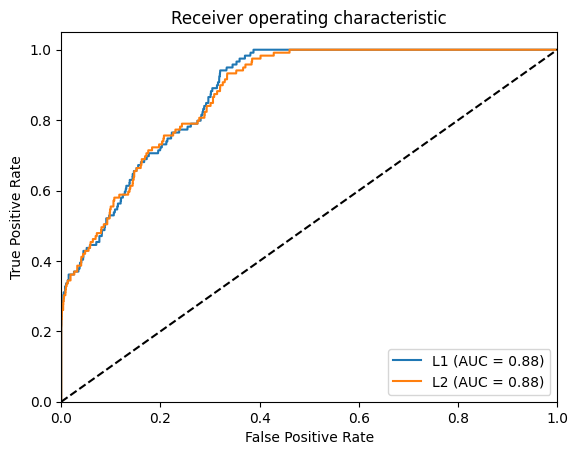

In [ ]:
# Matriz de confusión
conf_matrix_l1_2024 = confusion_matrix(y_test_2024, y_pred_l1_2024)
conf_matrix_l2_2024 = confusion_matrix(y_test_2024, y_pred_l2_2024)

# Curva ROC
fpr_l1_2024, tpr_l1_2024, _ = roc_curve(y_test_2024, y_prob_l1_2024)
roc_auc_l1_2024 = auc(fpr_l1_2024, tpr_l1_2024)
fpr_l2_2024, tpr_l2_2024, _ = roc_curve(y_test_2024, y_prob_l2_2024)
roc_auc_l2_2024 = auc(fpr_l2_2024, tpr_l2_2024)

# Accuracy
accuracy_l1_2024 = model_l1_2024.score(X_test_2024, y_test_2024)
accuracy_l2_2024 = model_l2_2024.score(X_test_2024, y_test_2024)

# Imprimir resultados
print("Matriz de confusión L1:\n", conf_matrix_l1_2024)
print("Matriz de confusión L2:\n", conf_matrix_l2_2024)
print("AUC L1:", roc_auc_l1_2024)
print("AUC L2:", roc_auc_l2_2024)
print("Accuracy L1:", accuracy_l1_2024)
print("Accuracy L2:", accuracy_l2_2024)

# Graficar las curvas ROC
plt.plot(fpr_l1_2024, tpr_l1_2024, label='L1 (AUC = %0.2f)' % roc_auc_l1_2024)
plt.plot(fpr_l2_2024, tpr_l2_2024, label='L2 (AUC = %0.2f)' % roc_auc_l2_2024)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Como se diferencian los resultados con el tp3 (comparando el modelo de regresion logistica)
##### 2024 ####
# Matriz de confusion de tp3: [[1988  0]
#                               [100  0]]
# AUC: 0.879
# Accuracy: 0.952

 "¿Cómo cambiaron los resultados con respecto al TP3? ¿La performance de regresión logística con regularización es mejor o peor?"

- El **AUC** en ambos anos es algo menor en el tp4, puede deberse a que tenemos muchas mas variables que generan ruido. Igualmente sigue siendo alto y cercano al del tp 3 (aprox 0.8)
- El nivel de **accuracy** es 0.95 y 0.97 en 2004 y 2024 respectivamente. El valor es muy cercano al del tp3, aunque en el tp3 el de 2004 es mayor (0.98), mientras que el de 2024 es menor (0.95).
- En conclusion, que los valores sean similares entre el tp3 y el 4 puede significar que el modelo del tp3 ya era lo suficientemente simple sin estar sobreajustado a los datos, o tambien que el lamda elegido es mas bajo de lo necesario para afectar los coeficientes del modelo.

***EJ 5***

Realicen un barrido en = 10n con n ∈ {−5, −4, −3 ..., +4, +5} y utilicen
 10-fold CV para elegir el óptimo en regresión logística con Ridge y con
 λ
 LASSO. ¿Qué seleccionó en cada caso? Usando la librería de seaborn,
 λ
 λ
 generen box plot mostrando la distribución del error de predicción para
 cada . Cada box debe corresponder a un valor de y contener como
 λ
 observaciones el error medio de validación (MSE) para cada partición.
 Además, para la regularización LASSO, generen un line plot del
 promedio de la proporción de variables ignoradas por el modelo en
 función de (como vieron en el tutorial 10), es decir la proporción de
 λ
 variables para las cuales el coeficiente asociado es cero.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
#import warnings

In [ ]:
#### ++++++ VAMO DE 0 A VER

#Vemos los missing values en Y
print('\nMissings en variable dependiente 2004:', np.isnan(respondieron_2004['desocupado']).sum())
print('\nMissings en variable dependiente 2024:', np.isnan(respondieron_2024['desocupado']).sum())

X_2004.info()
X_2024.info()
y_2004.info()
y_2024.info()


Missings en variable dependiente 2004: 0

Missings en variable dependiente 2024: 0
<class 'pandas.core.frame.DataFrame'>
Index: 12197 entries, 0 to 12211
Columns: 110 entries, ano4_x to pea
dtypes: bool(91), float64(15), int64(4)
memory usage: 2.9 MB
<class 'pandas.core.frame.DataFrame'>
Index: 10027 entries, 12212 to 22277
Columns: 110 entries, ano4_x to pea
dtypes: bool(91), float64(15), int64(4)
memory usage: 2.4 MB
<class 'pandas.core.series.Series'>
Index: 12197 entries, 0 to 12211
Series name: desocupado
Non-Null Count  Dtype
--------------  -----
12197 non-null  int64
dtypes: int64(1)
memory usage: 190.6 KB
<class 'pandas.core.series.Series'>
Index: 10027 entries, 12212 to 22277
Series name: desocupado
Non-Null Count  Dtype
--------------  -----
10027 non-null  int64
dtypes: int64(1)
memory usage: 156.7 KB


# ***2004***

In [ ]:
##### EJ 5 PARA 2004
from sklearn.preprocessing import StandardScaler

# Iniciamos el Standard Scaler para estandarizar las variables restando la media y escalando a la varianza de la unidad
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_transformed_2004 = pd.DataFrame(sc.fit_transform(X_train_2004), index=X_train_2004.index, columns=X_train_2004.columns)

# Estandarizamos las observaciones de test
X_test_transformed_2004 = pd.DataFrame(sc.transform(X_test_2004), index=X_test_2004.index, columns=X_test_2004.columns)

In [ ]:
# Estadisticas antes de estandarizar
X_train_2004.describe().T


,count,mean,std,min,25%,50%,75%,max
ano4_x,8537.0,2004.000000,0.000000,2004.0,2004.0,2004.0,2004.0,2004.0
nivel_ed,8537.0,3.435047,1.921681,1.0,2.0,3.0,5.0,7.0
region_x,8537.0,16.536605,20.278054,1.0,1.0,1.0,43.0,43.0
iv2,8537.0,3.103784,1.703821,1.0,2.0,3.0,4.0,99.0
iv5,8537.0,1.154504,0.396093,1.0,1.0,1.0,1.0,9.0
iv6,8537.0,1.088204,0.316410,0.0,1.0,1.0,1.0,3.0
iv8,8537.0,1.009605,0.098734,0.0,1.0,1.0,1.0,2.0
iv12_1,8537.0,1.902073,0.298020,0.0,2.0,2.0,2.0,2.0
ii1,8537.0,3.065480,1.590609,0.0,2.0,3.0,4.0,99.0
v1,8537.0,1.113974,0.317799,1.0,1.0,1.0,1.0,2.0


In [ ]:
# Estadisticas luego de estandarizar
X_train_transformed_2004.describe().T

,count,mean,std,min,25%,50%,75%,max
ano4_x,8537.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nivel_ed,8537.0,-1.435734e-17,1.000059,-1.267219,-0.746810,-0.226402,0.814414,1.855231
region_x,8537.0,-2.496929e-18,1.000059,-0.766223,-0.766223,-0.766223,1.305103,1.305103
iv2,8537.0,6.991401e-17,1.000059,-1.234817,-0.647866,-0.060916,0.526035,56.286344
iv5,8537.0,-4.952242e-17,1.000059,-0.390093,-0.390093,-0.390093,-0.390093,19.808374
iv6,8537.0,-1.073679e-16,1.000059,-3.439427,-0.278782,-0.278782,-0.278782,6.042508
iv8,8537.0,-9.966908e-16,1.000059,-10.226106,-0.097290,-0.097290,-0.097290,10.031527
iv12_1,8537.0,2.954699e-17,1.000059,-6.382739,0.328610,0.328610,0.328610,0.328610
ii1,8537.0,-4.411241e-17,1.000059,-1.927349,-0.669896,-0.041169,0.587558,60.316606
v1,8537.0,3.075384e-16,1.000059,-0.358658,-0.358658,-0.358658,-0.358658,2.788171


In [ ]:
# Rango de valores de n
exponentes = np.arange(-5, 6, 1)  # Genera [-5, -4, ..., 4, 5]

# Usar 10.0 en lugar de 10 para evitar el ValueError
alphas_ridge = 10.0 ** exponentes  # 10^n para Ridge
alphas_lasso = 10.0 ** exponentes  # 10^n para Lasso

print("Valores de alphas para Ridge:", alphas_ridge)
print("Valores de alphas para Lasso:", alphas_lasso)

Valores de alphas para Ridge: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]
Valores de alphas para Lasso: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]


**RIDGE 2004**

In [ ]:
# Ridge con validación cruzada 2004
ridgecv_2004 = RidgeCV(alphas = alphas_ridge, cv=10)
ridgecv_2004.fit(X_train_transformed_2004, y_train_2004)
print("Mejor alpha para Ridge:", ridgecv_2004.alpha_)

# Estimación final de Ridge con el mejor alpha
ridge_2004 = Ridge(alpha=ridgecv_2004.alpha_)
ridge_2004.fit(X_train_transformed_2004, y_train_2004)
ridge_pred_2004 = ridge_2004.predict(X_test_transformed_2004)
ecm_ridge_2004 = mean_squared_error(y_test_2004, ridge_pred_2004)

print("Error cuadrático medio para Ridge: ", ecm_ridge_2004)
print("Coeficientes del mejor modelo Ridge:")
print(pd.Series(ridge_2004.coef_, index=X_train_transformed_2004.columns))

Mejor alpha para Ridge: 1.0
Error cuadrático medio para Ridge:  0.04577592181943188
Coeficientes del mejor modelo Ridge:
ano4_x                0.000000
nivel_ed             -0.003893
region_x              0.001429
iv2                  -0.002625
iv5                   0.009274
iv6                   0.003699
iv8                   0.000545
iv12_1                0.004211
ii1                  -0.000179
v1                    0.024425
v6                    0.009643
v7                   -0.006041
v8                    0.006702
v17                  -0.013433
ix_tot                0.006653
aglomerado_x_2.0      0.000512
aglomerado_x_3.0      0.002683
aglomerado_x_32.0     0.001078
aglomerado_x_33.0    -0.002148
aglomerado_x_34.0    -0.000774
cat_ocup_0.0          0.241888
cat_ocup_1.0         -0.056388
cat_ocup_2.0         -0.098997
cat_ocup_3.0         -0.171514
cat_ocup_4.0         -0.038324
iv1_1.0               0.000786
iv1_2.0              -0.000308
iv1_3.0              -0.002707
iv1_4.0    

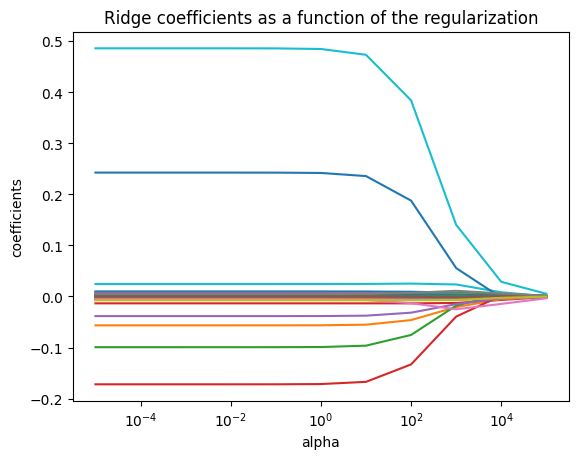

In [ ]:
coefs = []
for a in alphas_ridge:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_transformed_2004, y_train_2004)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas_ridge, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [ ]:
# Lista para almacenar los errores de cada pliegue por alpha
errors_ridge_alpha_04 = []

# Iterar sobre cada alpha y realizar la validación cruzada
for alpha in alphas_ridge:
    ridge_2004 = Ridge(alpha=alpha)

    # Calcular los errores de validación cruzada (MSE negativo)
    mse_per_fold_04 = -cross_val_score(ridge_2004, X_train_transformed_2004, y_train_2004, cv=10, scoring='neg_mean_squared_error')

    # Agregar los errores de cada pliegue a la lista
    for fold_idx, mse in enumerate(mse_per_fold_04):
        errors_ridge_alpha_04.append({
            'Alpha': alpha,
            'Fold': fold_idx,
            'MSE': mse
        })

# Convertir a DataFrame
errors_rigde_04 = pd.DataFrame(errors_ridge_alpha_04)
errors_rigde_04.head()

,Alpha,Fold,MSE
0,0.00001,0,0.043685
1,0.00001,1,0.046900
2,0.00001,2,0.041047
3,0.00001,3,0.047234
4,0.00001,4,0.046296


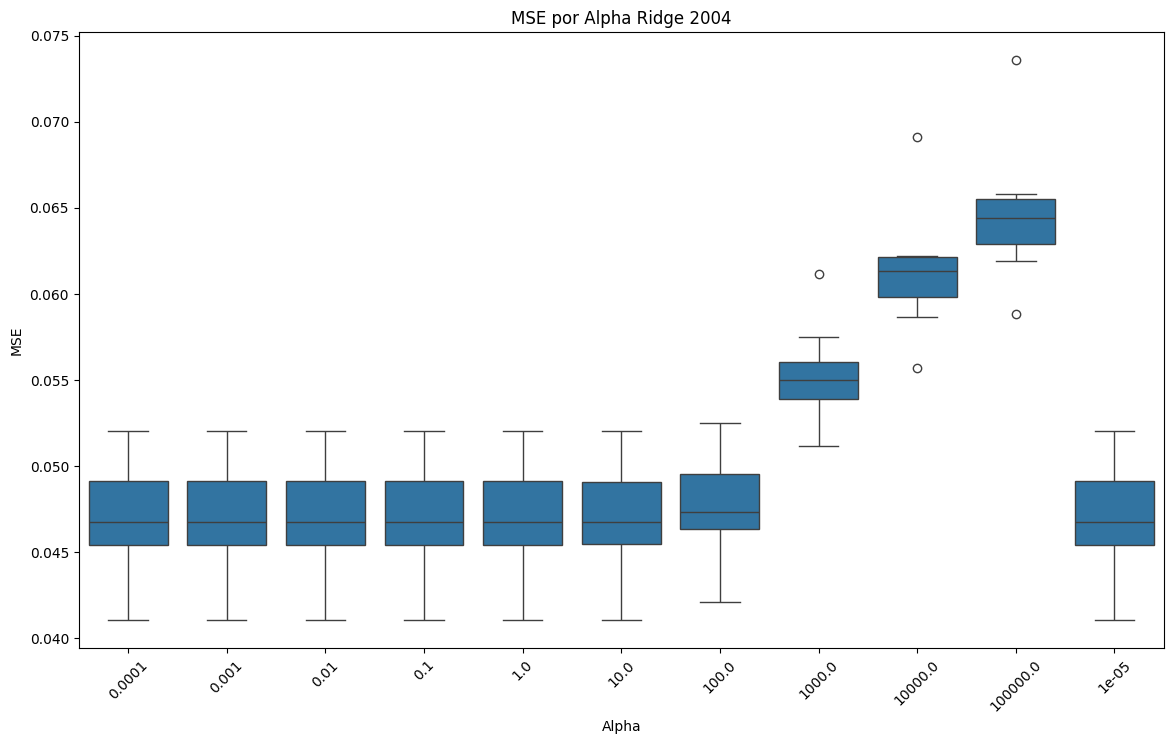

In [ ]:
# BOX PLOT
# columna alpha como categórica
errors_rigde_04['Alpha'] = errors_rigde_04['Alpha'].astype(str)

# Configuración de la visualización
plt.figure(figsize=(14, 8))

# Box plot con seaborn
sns.boxplot(x='Alpha', y='MSE', data=errors_rigde_04, order=sorted(errors_rigde_04['Alpha'].unique()))

# Configuración de etiquetas y título
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE por Alpha Ridge 2004')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Opcional: gira las etiquetas para mejor visibilidad
plt.show()

**LASSO 2004**

In [ ]:
lassocv_2004 = LassoCV(alphas = alphas_lasso, cv=10)
lassocv_2004.fit(X_train_transformed_2004, y_train_2004)
print("Mejor alpha para Lasso en 2004:", lassocv_2004.alpha_)

# Estimación final de Lasso con el mejor alpha
lasso_2004 = Lasso(alpha=lassocv_2004.alpha_)
lasso_2004.fit(X_train_transformed_2004, y_train_2004)
lasso_pred_2004 = lasso_2004.predict(X_test_transformed_2004)
ecm_lasso_2004 = mean_squared_error(y_test_2004, lasso_pred_2004)

print("Error cuadrático medio para Lasso en 2004: ", ecm_lasso_2004)
print("Coeficientes del mejor modelo Lasso en 2004:")
print(pd.Series(lasso_2004.coef_, index=X_train_transformed_2004.columns))

Mejor alpha para Lasso en 2004: 0.001
Error cuadrático medio para Lasso en 2004:  0.04567656888551713
Coeficientes del mejor modelo Lasso en 2004:
ano4_x                0.000000e+00
nivel_ed             -2.366345e-03
region_x              0.000000e+00
iv2                  -1.517700e-03
iv5                   6.704241e-03
iv6                   2.959094e-03
iv8                  -0.000000e+00
iv12_1                2.614632e-03
ii1                  -0.000000e+00
v1                    2.276244e-02
v6                    7.624932e-03
v7                   -5.052432e-03
v8                    5.936031e-03
v17                  -1.256690e-02
ix_tot                5.525899e-03
aglomerado_x_2.0      7.375176e-04
aglomerado_x_3.0      2.345868e-03
aglomerado_x_32.0     0.000000e+00
aglomerado_x_33.0    -1.351504e-03
aglomerado_x_34.0    -0.000000e+00
cat_ocup_0.0          3.846125e-01
cat_ocup_1.0         -1.343310e-02
cat_ocup_2.0          0.000000e+00
cat_ocup_3.0         -1.006163e-02
cat_ocup_4.0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e-01, tolerance: 6.070e-02
  model = cd_fast.enet_coordinate_descent(


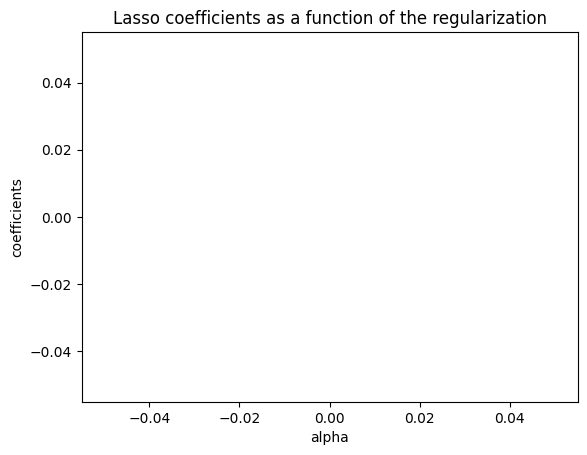

In [ ]:
coefs_lasso_2004 = []
for a in alphas_lasso:
    lasso_2004 = Lasso(alpha=a, fit_intercept=False)
    lasso_2004.fit(X_train_transformed_2004, y_train_2004)
    coefs_lasso_2004.append(lasso_2004.coef_)

ax_lasso_2004 = plt.gca()

ax.plot(alphas_lasso, coefs_lasso_2004)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [ ]:
# Lista para almacenar los errores de cada pliegue por alpha
errors_lasso_alpha_04 = []

# Iterar sobre cada alpha y realizar la validación cruzada
for alpha in alphas_lasso:
    lasso_2004 = Lasso(alpha=alpha)

    # Calcular los errores de validación cruzada (MSE negativo)
    mse_per_fold_lasso_04 = -cross_val_score(lasso_2004, X_train_transformed_2004, y_train_2004, cv=10, scoring='neg_mean_squared_error')

    # Agregar los errores de cada pliegue a la lista
    for fold_idx, mse in enumerate(mse_per_fold_lasso_04):
        errors_lasso_alpha_04.append({
            'Alpha': alpha,
            'Fold': fold_idx,
            'MSE': mse
        })

# Convertir a DataFrame
errors_lasso_04 = pd.DataFrame(errors_lasso_alpha_04)
errors_lasso_04.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.720e+00, tolerance: 5.089e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.842e-02, tolerance: 5.072e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.103e-01, tolerance: 5.098e

,Alpha,Fold,MSE
0,0.00001,0,0.043683
1,0.00001,1,0.046896
2,0.00001,2,0.041047
3,0.00001,3,0.047229
4,0.00001,4,0.046291


In [ ]:
min(errors_lasso_04['MSE'])

0.04104586018392007

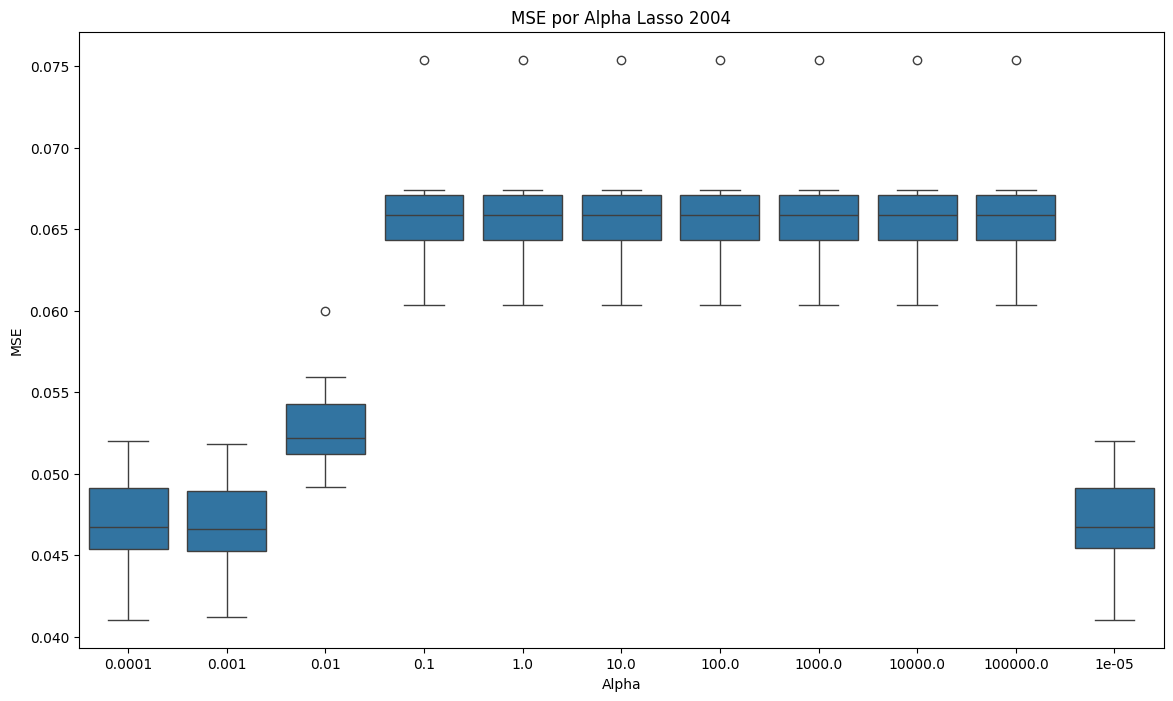

In [ ]:
# BOX PLOT
# columna alpha como categórica
errors_lasso_04['Alpha'] = errors_lasso_04['Alpha'].astype(str)

# Configuración de la visualización
plt.figure(figsize=(14, 8))

# Box plot con seaborn
sns.boxplot(x='Alpha', y='MSE', data=errors_lasso_04, order=sorted(errors_lasso_04['Alpha'].unique()))

# Configuración de etiquetas y título
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE por Alpha Lasso 2004')
plt.show()

# ***2024***

In [ ]:
##### EJ 5 PARA 2024

# Iniciamos el Standard Scaler para estandarizar las variables restando la media y escalando a la varianza de la unidad
sc_24 = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_transformed_2024 = pd.DataFrame(sc_24.fit_transform(X_train_2024), index=X_train_2024.index, columns=X_train_2024.columns)

# Estandarizamos las observaciones de test
X_test_transformed_2024 = pd.DataFrame(sc_24.transform(X_test_2024), index=X_test_2024.index, columns=X_test_2024.columns)

In [ ]:
# Estadisticas antes de estandarizar
X_train_2024.describe()#.T

,ano4_x,nivel_ed,region_x,iv2,iv5,iv6,iv8,iv12_1,ii1,v1,v6,v7,v8,v17,ix_tot,sin_iniciativa,trabajador_calidad,vive_solo,pea
count,7018.0,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000
mean,2024.0,3.852380,13.501852,3.117697,1.132231,1.022371,1.001710,1.963807,3.047592,1.135651,1.925620,1.953548,1.979339,1.908236,3.641636,0.373326,0.159875,0.095611,0.502137
std,0.0,1.737557,19.205053,3.017142,0.338766,0.159041,0.041318,0.186783,1.118598,0.434847,0.375078,0.340773,0.303418,0.393930,1.858916,0.483722,0.366516,0.294078,0.500031
min,2024.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.0,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2024.0,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,2024.0,5.000000,43.000000,4.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,0.000000,0.000000,1.000000
max,2024.0,7.000000,43.000000,99.000000,2.000000,3.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Estadisticas luego de estandarizar
X_train_transformed_2024.describe()#.T

,ano4_x,nivel_ed,region_x,iv2,iv5,iv6,iv8,iv12_1,ii1,v1,v6,v7,v8,v17,ix_tot,aglomerado_x_2.0,aglomerado_x_3.0,aglomerado_x_32.0,aglomerado_x_33.0,aglomerado_x_34.0,cat_ocup_0.0,cat_ocup_1.0,cat_ocup_2.0,cat_ocup_3.0,cat_ocup_4.0,iv1_1.0,iv1_2.0,iv1_3.0,iv1_4.0,iv1_5.0,iv1_6.0,iv3_0.0,iv3_1.0,iv3_2.0,iv3_3.0,iv3_4.0,iv4_0.0,iv4_0.0,iv4_1.0,iv4_1.0,iv4_2.0,iv4_2.0,iv4_3.0,iv4_3.0,iv4_4.0,iv4_4.0,iv4_5.0,iv4_5.0,iv4_6.0,iv4_6.0,iv4_7.0,iv4_7.0,iv4_9.0,iv4_9.0,iv4_0.0,iv4_0.0,iv4_1.0,iv4_1.0,iv4_2.0,iv4_2.0,iv4_3.0,iv4_3.0,iv4_4.0,iv4_4.0,iv4_5.0,iv4_5.0,iv4_6.0,iv4_6.0,iv4_7.0,iv4_7.0,iv4_9.0,iv4_9.0,iv7_0.0,iv7_1.0,iv7_2.0,iv7_3.0,iv7_4.0,iv9_0.0,iv9_1.0,iv9_2.0,iv9_3.0,iv10_0.0,iv10_1.0,iv10_2.0,iv10_3.0,iv11_0.0,iv11_1.0,iv11_2.0,iv11_3.0,iv11_4.0,iv11_9.0,ii7_0.0,ii7_1.0,ii7_2.0,ii7_3.0,ii7_4.0,ii7_5.0,ii7_6.0,ii7_7.0,ii7_8.0,ii7_9.0,ii8_0.0,ii8_1.0,ii8_2.0,ii8_3.0,ii8_4.0,sin_iniciativa,trabajador_calidad,vive_solo,pea
count,7018.0,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7018.0,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7018.0,7018.0,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7018.0,7018.0,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7018.0,7018.0,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7018.0,7018.0,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7018.0,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7018.0,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7018.0,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03,7.018000e+03
mean,0.0,-1.518686e-17,-4.049830e-18,-5.062288e-18,-4.302945e-17,6.682220e-17,1.258485e-15,9.112118e-17,1.139015e-16,2.278030e-16,-1.052956e-16,-1.756614e-16,1.478188e-16,-2.419774e-16,-8.200906e-17,-3.999207e-17,3.543602e-17,5.277435e-17,8.099661e-18,-2.784258e-17,2.024915e-18,1.012458e-17,3.189241e-17,-7.087203e-17,-1.012458e-18,1.721178e-17,6.024123e-17,-9.112118e-18,-3.847339e-17,-7.593432e-18,7.593432e-19,0.0,-1.280759e-16,9.618347e-18,1.113703e-17,2.024915e-18,0.0,0.0,-1.113703e-17,-1.113703e-17,1.012458e-18,1.012458e-18,-1.771801e-17,-1.771801e-17,-8.099661e-18,-8.099661e-18,-4.859796e-17,-4.859796e-17,0.0,0.0,-2.024915e-18,-2.024915e-18,-4.049830e-18,-4.049830e-18,0.0,0.0,-1.113703e-17,-1.113703e-17,1.012458e-18,1.012458e-18,-1.771801e-17,-1.771801e-17,-8.099661e-18,-8.099661e-18,-4.859796e-17,-4.859796e-17,0.0,0.0,-2.024915e-18,-2.024915e-18,-4.049830e-18,-4.049830e-18,0.0,7.593432e-17,2.024915e-17,-9.112118e-18,7.593432e-19,6.074746e-18,-9.263987e-17,-1.012458e-17,0.0,6.074746e-18,2.348902e-16,4.657305e-17,1.822424e-17,6.074746e-18,6.631597e-17,-1.468064e-17,2.733635e-17,-2.024915e-18,0.0,-3.037373e-18,3.847339e-17,8.504644e-17,-7.492186e-17,-4.049830e-17,-1.012458e-17,2.303341e-17,2.581767e-17,-2.784258e-17,3.391733e-17,-3.037373e-18,-3.239864e-17,-5.264779e-17,-5.568517e-18,-7.492186e-17,-1.316195e-17,-3.746093e-17,-1.974292e-17,-1.093454e-16
std,0.0,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+

In [ ]:
# Rango de valores de n
exponentes_2024 = np.arange(-5, 6, 1)  # Genera de -5 a 5

# Usar 10.0 en lugar de 10 para evitar el ValueError
alphas_ridge_2024 = 10.0 ** exponentes_2024  # 10^n para Ridge
alphas_lasso_2024 = 10.0 ** exponentes_2024  # 10^n para Lasso

print("Valores de alphas para Ridge:", alphas_ridge_2024)
print("Valores de alphas para Lasso:", alphas_lasso_2024)

Valores de alphas para Ridge: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]
Valores de alphas para Lasso: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]


**RIDGE 2024**

In [ ]:
# Ridge con validación cruzada 2024
ridgecv_2024 = RidgeCV(alphas = alphas_ridge_2024, cv=10)
ridgecv_2024.fit(X_train_transformed_2024, y_train_2024)
print("Mejor alpha para Ridge:", ridgecv_2024.alpha_)

# Estimación final de Ridge con el mejor alpha
ridge_2024 = Ridge(alpha=ridgecv_2024.alpha_)
ridge_2024.fit(X_train_transformed_2024, y_train_2024)
ridge_pred_2024 = ridge_2024.predict(X_test_transformed_2024)
ecm_ridge_2024 = mean_squared_error(y_test_2024, ridge_pred_2024)

print("Error cuadrático medio para Ridge: ", ecm_ridge_2024)
print("Coeficientes del mejor modelo Ridge:")
print(pd.Series(ridge_2024.coef_, index=X_train_transformed_2024.columns))

Mejor alpha para Ridge: 0.1
Error cuadrático medio para Ridge:  0.0295251189322757
Coeficientes del mejor modelo Ridge:
ano4_x                0.000000
nivel_ed             -0.007183
region_x             -0.000140
iv2                  -0.000257
iv5                   0.003904
iv6                   0.004119
iv8                   0.000025
iv12_1                0.001370
ii1                  -0.001494
v1                    0.022055
v6                   -0.002696
v7                   -0.018633
v8                    0.003226
v17                  -0.004549
ix_tot                0.005447
aglomerado_x_2.0     -0.001649
aglomerado_x_3.0      0.001495
aglomerado_x_32.0    -0.000896
aglomerado_x_33.0     0.000761
aglomerado_x_34.0    -0.000048
cat_ocup_0.0          0.267515
cat_ocup_1.0         -0.053835
cat_ocup_2.0         -0.124592
cat_ocup_3.0         -0.182443
cat_ocup_4.0         -0.010175
iv1_1.0               0.000274
iv1_2.0              -0.000169
iv1_3.0               0.005631
iv1_4.0     

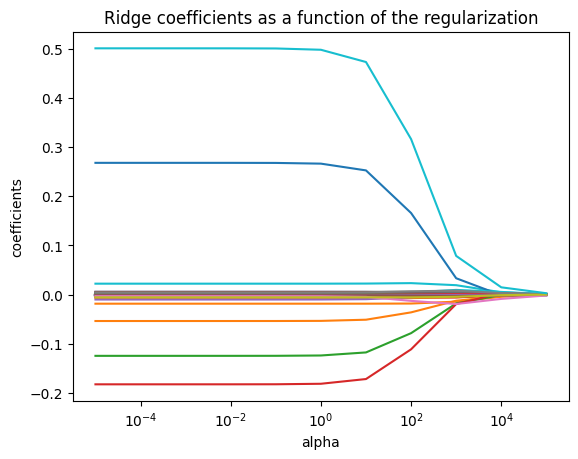

In [ ]:
coefs_ridge_2024 = []
for a in alphas_ridge_2024:
    ridge_2024 = Ridge(alpha=a, fit_intercept=False)
    ridge_2024.fit(X_train_transformed_2024, y_train_2024)
    coefs_ridge_2024.append(ridge_2024.coef_)

ax_ridge_2024 = plt.gca()

ax_ridge_2024.plot(alphas_ridge_2024, coefs_ridge_2024)
ax_ridge_2024.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [ ]:
# Lista para almacenar los errores de cada pliegue por alpha
errors_ridge_alpha_24 = []

# Iterar sobre cada alpha y realizar la validación cruzada
for alpha in alphas_ridge_2024:
    ridge_2024 = Ridge(alpha=alpha)

    # Calcular los errores de validación cruzada (MSE negativo)
    mse_per_fold_24 = -cross_val_score(ridge_2024, X_train_transformed_2024, y_train_2024, cv=10, scoring='neg_mean_squared_error')

    # Agregar los errores de cada pliegue a la lista
    for fold_idx, mse in enumerate(mse_per_fold_24):
        errors_ridge_alpha_24.append({
            'Alpha': alpha,
            'Fold': fold_idx,
            'MSE': mse
        })

# Convertir a DataFrame
errors_ridge_24 = pd.DataFrame(errors_ridge_alpha_24)
errors_ridge_24.head()

,Alpha,Fold,MSE
0,0.00001,0,0.024629
1,0.00001,1,0.041110
2,0.00001,2,0.030255
3,0.00001,3,0.039838
4,0.00001,4,0.020917


In [ ]:
min(errors_ridge_24['MSE'])

0.020916694317567184

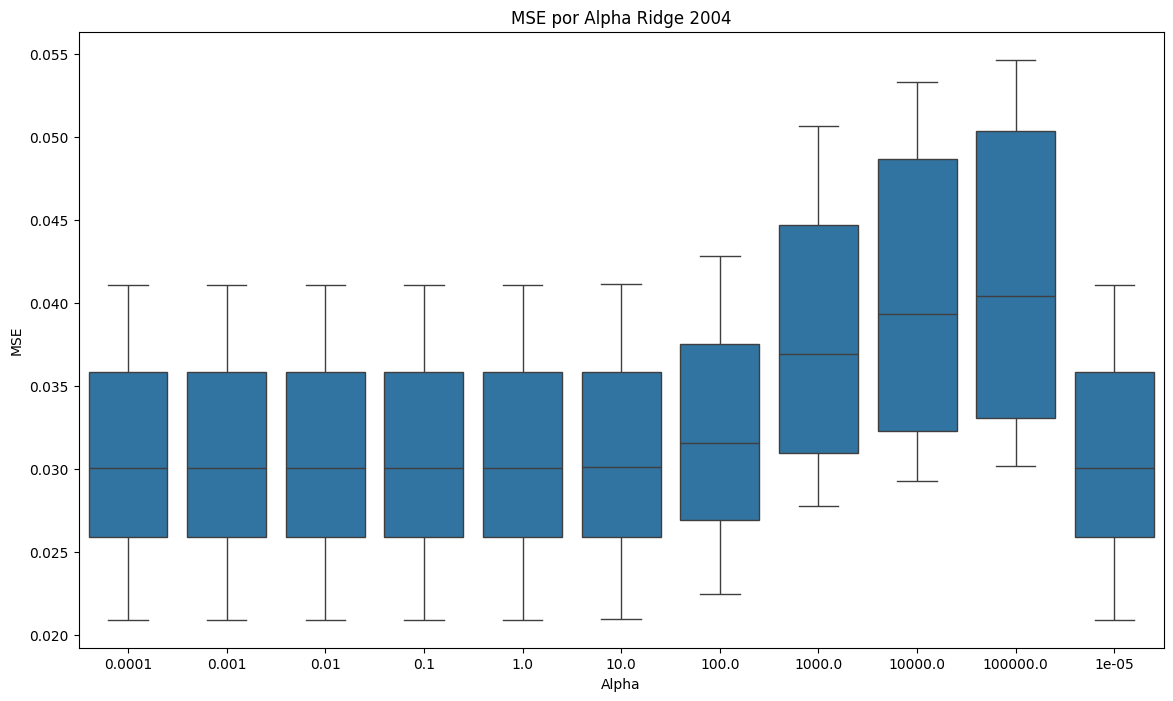

In [ ]:
# BOX PLOT
# columna alpha como categórica
errors_ridge_24['Alpha'] = errors_ridge_24['Alpha'].astype(str)

# Configuración de la visualización
plt.figure(figsize=(14, 8))

# Box plot con seaborn
sns.boxplot(x='Alpha', y='MSE', data=errors_ridge_24, order=sorted(errors_ridge_24['Alpha'].unique()))

# Configuración de etiquetas y título
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE por Alpha Ridge 2004')
plt.show()

**LASSO 2024**

In [ ]:
lassocv_2024 = LassoCV(alphas = alphas_lasso_2024, cv=10)
lassocv_2024.fit(X_train_transformed_2024, y_train_2024)
print("Mejor alpha para Lasso:", lassocv_2024.alpha_)

# Estimación final de Lasso con el mejor alpha
lasso_2024 = Lasso(alpha=lassocv_2024.alpha_)
lasso_2024.fit(X_train_transformed_2024, y_train_2024)
lasso_pred_2024 = lasso_2024.predict(X_test_transformed_2024)
ecm_lasso_2024 = mean_squared_error(y_test_2024, lasso_pred_2024)

print("Error cuadrático medio para Lasso: ", ecm_lasso_2024)
print("Coeficientes del mejor modelo Lasso:")
print(pd.Series(lasso_2024.coef_, index=X_train_transformed_2024.columns))

Mejor alpha para Lasso: 0.001
Error cuadrático medio para Lasso:  0.029538377068333264
Coeficientes del mejor modelo Lasso:
ano4_x                0.000000e+00
nivel_ed             -5.821943e-03
region_x             -0.000000e+00
iv2                  -0.000000e+00
iv5                   3.055966e-03
iv6                   3.491706e-03
iv8                   0.000000e+00
iv12_1                0.000000e+00
ii1                  -2.026335e-04
v1                    1.936137e-02
v6                   -1.406793e-03
v7                   -1.647415e-02
v8                    1.102226e-03
v17                  -3.340717e-03
ix_tot                4.340034e-03
aglomerado_x_2.0     -8.299616e-04
aglomerado_x_3.0      2.094514e-04
aglomerado_x_32.0    -1.277412e-03
aglomerado_x_33.0     5.414600e-05
aglomerado_x_34.0    -0.000000e+00
cat_ocup_0.0          4.077288e-01
cat_ocup_1.0         -7.379707e-03
cat_ocup_2.0         -4.783000e-03
cat_ocup_3.0         -0.000000e+00
cat_ocup_4.0          8.337735e-04
i

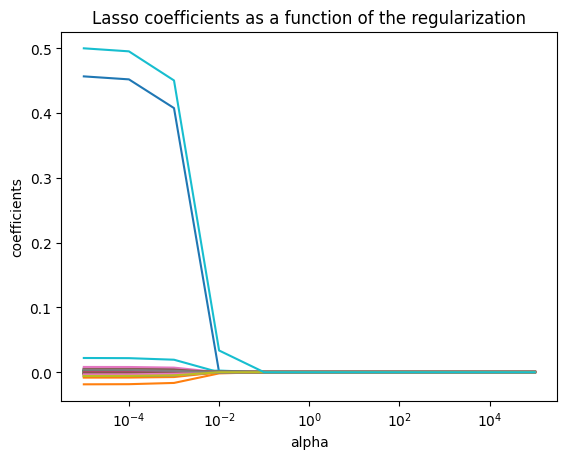

In [ ]:
coefs_lasso_2024 = []
for a in alphas_lasso_2024:
    lasso_2024 = Lasso(alpha=a, fit_intercept=False)
    lasso_2024.fit(X_train_transformed_2024, y_train_2024)
    coefs_lasso_2024.append(lasso_2024.coef_)

ax_lasso_2024 = plt.gca()

ax_lasso_2024.plot(alphas_lasso_2024, coefs_lasso_2024)
ax_lasso_2024.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [ ]:
# Lista para almacenar los errores de cada pliegue por alpha
errors_lasso_alpha_24 = []

# Iterar sobre cada alpha y realizar la validación cruzada
for alpha in alphas_lasso_2024:
    lasso_2024 = Lasso(alpha=alpha)

    # Calcular los errores de validación cruzada (MSE negativo)
    mse_per_fold_lasso_24 = -cross_val_score(lasso_2024, X_train_transformed_2024, y_train_2024, cv=10, scoring='neg_mean_squared_error')

    # Agregar los errores de cada pliegue a la lista
    for fold_idx, mse in enumerate(mse_per_fold_lasso_24):
        errors_lasso_alpha_24.append({
            'Alpha': alpha,
            'Fold': fold_idx,
            'MSE': mse
        })

# Convertir a DataFrame
errors_lasso_24 = pd.DataFrame(errors_lasso_alpha_24)
errors_lasso_24.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.910e-02, tolerance: 2.721e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.612e-02, tolerance: 2.557e-02
  model = cd_fast.enet_coordinate_descent(


,Alpha,Fold,MSE
0,0.00001,0,0.024627
1,0.00001,1,0.041108
2,0.00001,2,0.030253
3,0.00001,3,0.039835
4,0.00001,4,0.020915


In [ ]:
min(errors_lasso_24['MSE'])

0.020868091643480368

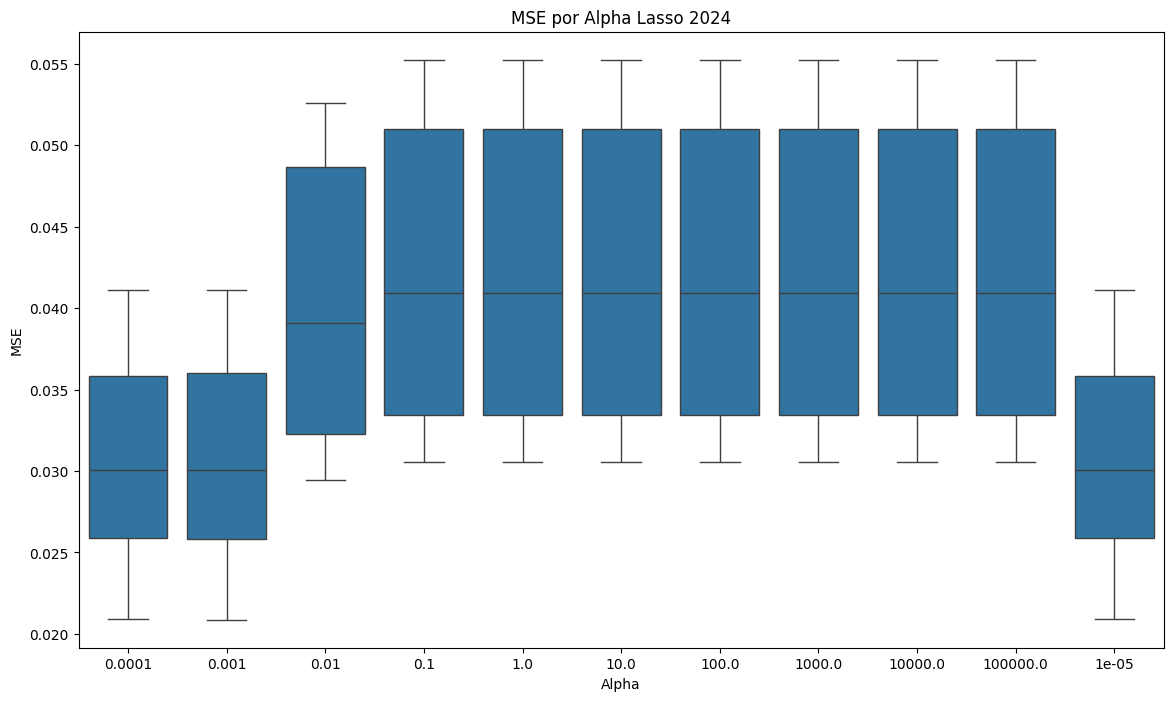

In [ ]:
# BOX PLOT
# columna alpha como categórica
errors_lasso_24['Alpha'] = errors_lasso_24['Alpha'].astype(str)

# Configuración de la visualización
plt.figure(figsize=(14, 8))

# Box plot con seaborn
sns.boxplot(x='Alpha', y='MSE', data=errors_lasso_24, order=sorted(errors_lasso_24['Alpha'].unique()))

# Configuración de etiquetas y título
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE por Alpha Lasso 2024')
plt.show()

***EJ 6***

En el caso del valor óptimo de λ para LASSO encontrado en el inciso
anterior, ¿qué variables fueron descartadas? ¿Son las que hubieran
esperado? ¿Tiene relación con lo que respondieron en el inciso 1 de la
Parte I?

PARA 2004 fueron descartadas:
- ano4_x
- region_x
- iv8                  
- ii1
- aglomerado_x_32.0     
- aglomerado_x_34.0
- cat_ocup_2.0
- iv1_2.0
- iv1_5.0
- iv3_1.0
- iv3_2.0
- iv3_3.0               
- iv4_1.0
- iv4_2.0
- iv4_5.0               
- iv4_6.0
- iv7_0.0              
- iv7_1.0              
- iv7_2.0
- iv9_0.0              
- iv9_1.0            
- iv9_3.0   
- iv10_1.0              
- iv10_2.0   
- iv11_2.0          
- iv11_4.0             
- ii7_1.0             
- ii7_2.0  
- ii7_5.0
- ii7_7.0
- ii8_1.0
- ii8_2.0
- ii8_4.0                                

@JUAN hace lo mismo para LASSO 2024, las que saca del modelo son las que los coeficientes dan 0

***EJ 7***

Elijan alguno de los modelos de regresión logística donde hayan probado
distintos parámetros de regularización y comenten: Compare los
resultados de 2004 versus 2024, ¿qué método de regularización funcionó
mejor: Ridge o LASSO? ¿LASSO hizo una selección distinta de
predictores en 2004 versus 2024? Comenten mencionando el error
cuadrático medio (MSE).
